# Data and Web Mining
## Kaggle ft Child Institute: problematic internet use 
alleneremo e metteremo a confronto due modelli. uno ad albero e uno basato su rete neurale.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif # vedere correlazioni tra feature e label


# Preparazione dati : 
1) split train & test 

2) eliminare le colonne del train cui c'è una quantità di NaN maggiore del 50% 

3) fare correlazione fra le colonne ed eliminare tutte le colonne con una forte correlazione fra di loro e una bassa correlazione con il target .
**Filter approaches**: Features are selected before the data mining algorithm is run. The specific filtering method might be independent of the learning algorithm. For instance, we may remove features with little correlation with the target, or remove a feature that is highly correlated with another one (it is redundant).

4) Usare un wrapper Approach per una semiconferma (va bene anche un modello lineare multivariato).
**Wrapper approaches**: Feature are selected on the basis of their contribution, and the contribution is measured after running the algorithm as a black-box.

In [2]:


# read data : 
data = pd.read_csv("../data/train.csv") # dataset intero

Y = data['sii']     # classe da predire

X = data.drop(columns=['id','sii'])     # features

# non ha senso lasciare righe in cui la label non si conosce. è supervised learning: ogni riga deve avere la sua classificazione
X = X[Y.notnull()]
Y = Y[Y.notnull()]
print("X shape", X.shape)
X

X shape (2736, 80)


,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,...,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0
1,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,...,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0
2,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,...,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0
3,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,...,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0
5,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,NaN,...,3.0,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,Fall,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,25.0,...,0.0,2.0,2.0,1.0,22.0,Fall,41.0,58.0,Fall,2.0
3954,Summer,7,1,NaN,NaN,Summer,13.927006,48.5,46.6,23.0,...,3.0,3.0,3.0,0.0,33.0,Summer,48.0,67.0,Summer,0.0
3955,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,NaN,...,2.0,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0
3957,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,NaN,...,1.0,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0


In [3]:
# split train & test : 
from sklearn.model_selection import train_test_split

# slip train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=SEED)

# split train & val 
X_train,X_val , y_train, y_val = train_test_split(
    X_train,y_train,test_size = 0.2,random_state=SEED
)

vado a contare il numero di missing values per ogni colonna presente in train. Voglio eliminare tutte le colonne che hanno più del 50% di missing values.
Sulle colonne selezionate vado fare la matrice di correlazione e vado ad eliminare le colonne rimaste che possono risultare ridondandi.

In [4]:
num_of_instances , num_of_columns = X_train.shape
num_of_instances


columns_to_keep = X_train.isnull().sum().sort_values(ascending=False)  < (num_of_instances//2)
columns_to_keep

PAQ_A-Season                    False
PAQ_A-PAQ_A_Total               False
Physical-Waist_Circumference    False
Fitness_Endurance-Time_Mins     False
Fitness_Endurance-Time_Sec      False
                                ...  
Basic_Demos-Sex                  True
PCIAT-PCIAT_01                   True
PCIAT-Season                     True
PCIAT-PCIAT_02                   True
PCIAT-PCIAT_Total                True
Length: 80, dtype: bool

In [5]:
num_of_instances , num_of_columns = X_train.shape
num_of_instances

X_train = X_train.loc[:, columns_to_keep]
X_train.columns

Index(['Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'Physical-Systolic_BP', 'FGC-Season',
       'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone',
       'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone',
       'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_C-Season', 'PAQ_C-PAQ_C_Total', 'PCIAT-Season',
       'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04',
       'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08',
 

In [6]:
# mapping stagioni
season_map = {
    # il mapping darà NaN quando incontra NaN, quindi viene gestito in automatico
    'Winter': 0,
    'Spring': 1,
    'Summer': 2,
    'Fall': 3
}

# colonne che terminano in "-Season"

season_cols = [col for col in X_train.columns if col.endswith('Season')]

for col in season_cols:
    X_train[col] = X_train[col].map(season_map)



Voglio calcolare la matrice delle correlazioni in modo da porter vedere quali di queste risultano ridondanti e poco correlate con il Sii.

In [7]:
X_train.corr()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,...,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
Basic_Demos-Enroll_Season,1.000000,-0.022937,0.014801,-0.299809,-0.033591,0.298180,-0.038912,-0.043278,-0.015948,-0.015905,...,-0.009726,-0.009035,-0.017690,0.010507,-0.011213,0.277601,0.052060,0.051602,0.951792,-0.023861
Basic_Demos-Age,-0.022937,1.000000,0.073780,0.033083,-0.031213,-0.013270,0.492418,0.892366,0.766513,0.127898,...,0.284687,0.171325,0.289424,0.279128,0.414401,-0.063068,0.024425,0.026186,-0.005963,0.419653
Basic_Demos-Sex,0.014801,0.073780,1.000000,-0.010634,0.127421,0.001442,0.048227,-0.000383,0.015131,0.014095,...,-0.095151,-0.095106,-0.093957,-0.049889,-0.070898,0.004256,-0.019773,-0.018837,0.021119,0.007362
CGAS-Season,-0.299809,0.033083,-0.010634,1.000000,0.048655,-0.014046,0.034231,0.025352,0.026951,-0.033662,...,0.006437,-0.024527,0.015819,0.017289,0.009640,-0.039020,-0.032027,-0.031174,-0.279754,0.002525
CGAS-CGAS_Score,-0.033591,-0.031213,0.127421,0.048655,1.000000,-0.000976,-0.063280,-0.020862,-0.054213,-0.007124,...,-0.047389,-0.088561,-0.059145,-0.070745,-0.074815,0.026805,-0.155961,-0.157248,-0.029538,-0.092705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SDS-Season,0.277601,-0.063068,0.004256,-0.039020,0.026805,0.663702,-0.069474,-0.055468,-0.061853,-0.017809,...,-0.026315,-0.036517,-0.022052,-0.008084,-0.055775,1.000000,0.010393,0.011840,0.270959,-0.027156
SDS-SDS_Total_Raw,0.052060,0.024425,-0.019773,-0.032027,-0.155961,-0.004516,0.070434,0.030047,0.053555,0.007284,...,0.173363,0.249385,0.185786,0.214800,0.246217,0.010393,1.000000,0.998681,0.039856,0.073435
SDS-SDS_Total_T,0.051602,0.026186,-0.018837,-0.031174,-0.157248,-0.002278,0.070680,0.031879,0.054202,0.006937,...,0.176692,0.250551,0.188279,0.216795,0.248477,0.011840,0.998681,1.000000,0.040015,0.075366
PreInt_EduHx-Season,0.951792,-0.005963,0.021119,-0.279754,-0.029538,0.302197,-0.029098,-0.028557,-0.001586,-0.012800,...,-0.010542,-0.012766,-0.030641,0.000806,-0.011515,0.270959,0.039856,0.040015,1.000000,-0.027621


In [8]:
X_train.shape

(1750, 69)

Ricalcolo la matrice di correlazione e vado a rimuovere le colonne che sono meno correlate con la risposta

In [9]:

# 1. Inserisci il target come colonna temporanea
X_temp = X_train.copy()
X_temp.insert(0, column="Sii", value=y_train)

# 2. Calcola la matrice di correlazione assoluta
corr_matrix = X_temp.corr().abs()

# 3. Estrai correlazione col target (riga "Sii", escludendo "Sii" stesso)
target_corr = corr_matrix.loc["Sii"].drop("Sii")

useful_features = target_corr[(target_corr >= 0.1) & (target_corr <= 0.9)].index.tolist()

# 5. Riduci la matrice alle sole feature utili
corr_matrix_useful = corr_matrix.loc[useful_features, useful_features]

# 6. Calcola triangolare superiore per evitare duplicati
upper_tri = corr_matrix_useful.where(np.triu(np.ones(corr_matrix_useful.shape), k=1).astype(bool))

# 7. Elimina le feature ridondanti (correlazione > 0.9)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

# 8. Crea la versione filtrata del dataset
selected_features = [col for col in useful_features if col not in to_drop]
X_train_filtered = X_train[selected_features]  # y_train resta separato

X_train_filtered.shape

(1750, 34)

<Axes: >

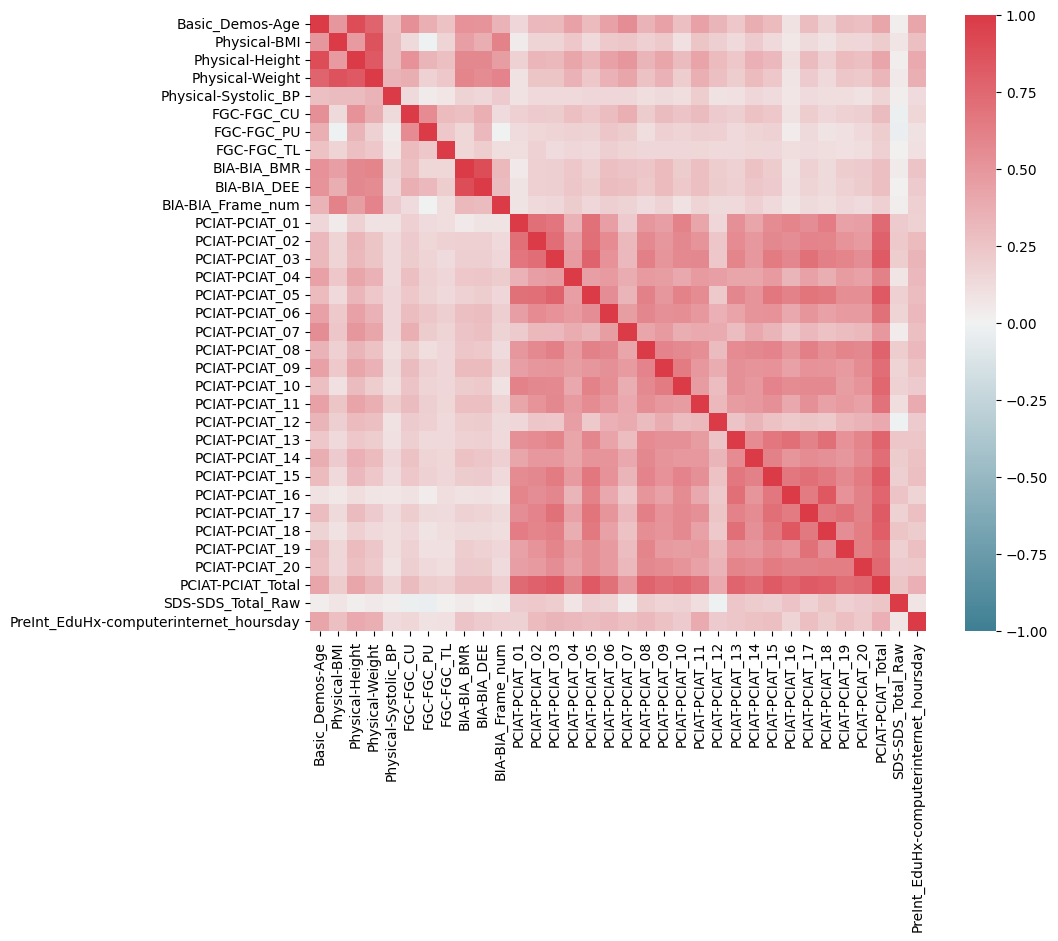

In [10]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = X_train_filtered.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

Posso allenare una random forest per eseguire un'ulteriore scrematura delle features.

C:\Users\Dav\AppData\Local\Temp\ipykernel_2392\2826072662.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance_cv_sorted, y=feat_importance_cv_sorted.index, palette="viridis")


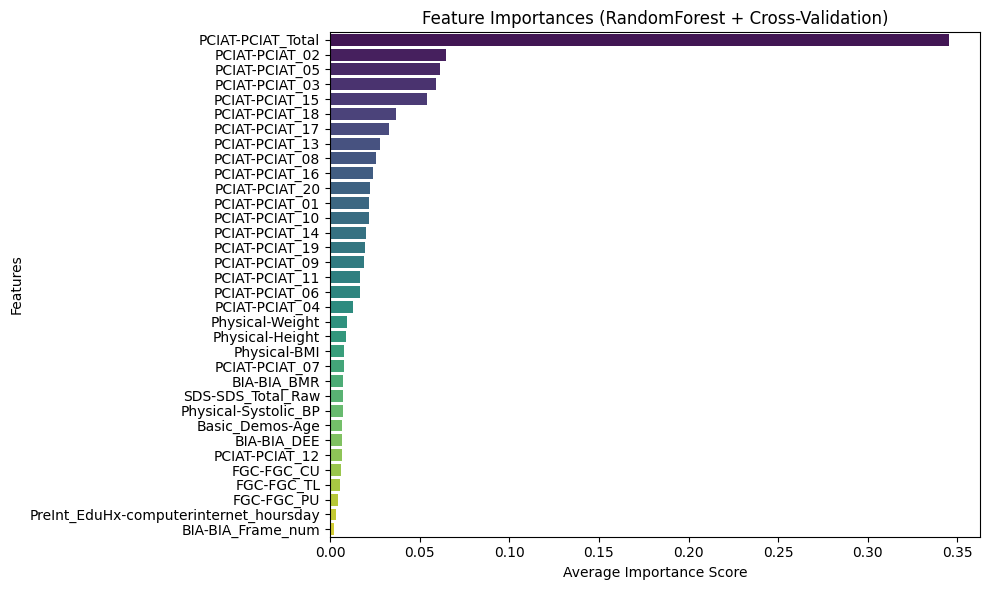

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np


kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
importances_list = []

for train_idx, val_idx in kf.split(X_train_filtered, y_train):
    X_fold_train, y_fold_train = X_train_filtered.iloc[train_idx], y_train.iloc[train_idx]
    
    model = RandomForestClassifier(random_state=SEED)
    model.fit(X_fold_train, y_fold_train)
    
    importances_list.append(model.feature_importances_)

# Media delle importanze sui fold
mean_importances = np.mean(importances_list, axis=0)

# Associa nomi feature
feat_importance_cv = pd.Series(mean_importances, index=X_train_filtered.columns)
feat_importance_cv_sorted = feat_importance_cv.sort_values(ascending=False)

# Visualizza
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance_cv_sorted, y=feat_importance_cv_sorted.index, palette="viridis")
plt.title("Feature Importances (RandomForest + Cross-Validation)")
plt.xlabel("Average Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


Dai grafici risultati si legge che la feature che contribuisce di più alla predizione di Sii è la variabile PCIAT-PCIAT_Total seguite dalle domande '02' , '05','03','15','17'.

Può essere interessante anche buttare un occhio all'analisi statistica "mutual information", che non dipende dal modello, ma misura "quanto sapere la feature aiuta a prevedere la classe". Messa in grafico col NaN ratio, dà anch'essa una buona misura di cosa sia significativo o meno, per confrontarlo coi risultati ottenuti dalla feature importance appena calcolata. 

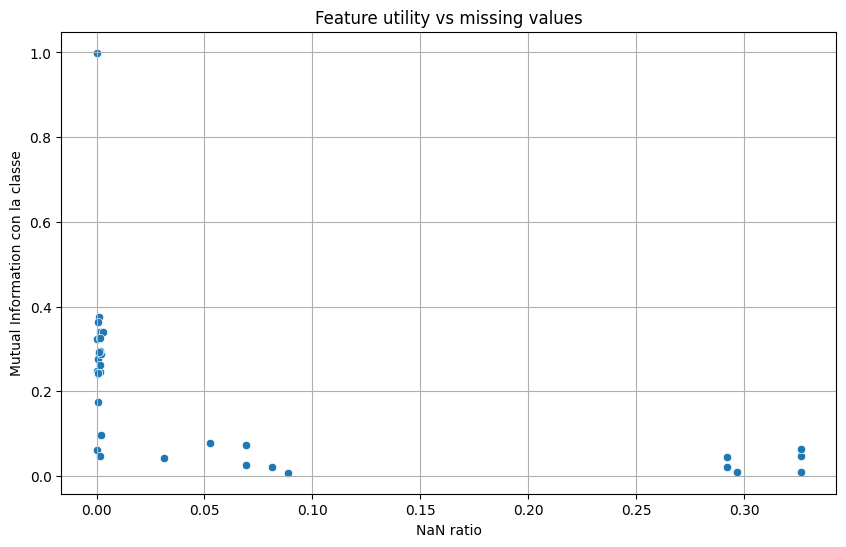

In [12]:
X_train_mi = X_train_filtered.copy()
Y_train_mi = y_train.copy() 

mi = mutual_info_classif(X_train_mi.fillna(-9999), Y_train_mi) # non gestisce in automatico i NaN

mi_series = pd.Series(mi, index=X_train_mi.columns)

nan_ratio = X_train_mi.isnull().mean()

# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=nan_ratio, y=mi_series)
plt.xlabel("NaN ratio")
plt.ylabel("Mutual Information con la classe")
plt.title("Feature utility vs missing values")
plt.grid(True)
plt.show()

**Osservazioni:**

* Molti punti si trovano a sinistra (NaN ≈ 0), il che indica che molte feature non hanno praticamente valori mancanti.
* Alcune feature mostrano un valore di Mutual Information (MI) superiore a 0.2, segnalando una forte relazione con la label.
* Ci sono feature con il 30% di valori assenti e una MI bassa -> queste presumibilmente risultano poco informative.
* Viene confermata la presenza di almeno una feature con MI ≈ 1, fortemente predittiva della label.

Mutual Information e Feature Importance sono concetti simili, ma non equivalenti.

* La Mutual Information valuta la dipendenza tra una singola feature e la label, senza tenere conto di correlazioni tra le feature.
* La Feature Importance calcolata su un modello ad albero (nello specifico del nostro caso, Random Forest) misura quanto una feature contribuisce alla goodness durante le split, quindi nel contesto del modello.

Entrambi gli approcci presentano limiti, ma in modo opposto:

* Se due feature sono fortemente correlate tra loro, la Feature Importance può "dividersi" tra le due. Una potrebbe risultare poco importante semplicemente perché l'informazione è già stata assorbita dall'altra nei rami precedenti.
* La Mutual Information, invece, non tiene conto delle combinazioni tra feature. Una singola feature può avere MI ≈ 0, ma una combinazione di due feature può essere altamente predittiva. Un esempio è `Y = A XOR B`: A e B da sole non predicono Y, ma la loro combinazione sì. Scartandone una si perderebbe completamente la capacità predittiva.

Per questo motivo è utile valutare visivamente entrambe le misure nelle fasi preliminari, prima di prendere decisioni definitive sull'eliminazione delle feature.

In [13]:
nan_1 = mi_series[nan_ratio > 0.25]
print("Feature con NaN ratio > 0.25:")
print(nan_1)

mi_high_sorted = mi_series[mi_series > 0.2].sort_values(ascending=False)
print("\nFeature con alta mutual information, ordinate in modo decrescente:")
print(mi_high_sorted)

Feature con NaN ratio > 0.25:
FGC-FGC_CU           0.043756
FGC-FGC_PU           0.010125
FGC-FGC_TL           0.020724
BIA-BIA_BMR          0.048159
BIA-BIA_DEE          0.064550
BIA-BIA_Frame_num    0.009929
dtype: float64

Feature con alta mutual information, ordinate in modo decrescente:
PCIAT-PCIAT_Total    0.999244
PCIAT-PCIAT_03       0.375937
PCIAT-PCIAT_05       0.362514
PCIAT-PCIAT_15       0.340810
PCIAT-PCIAT_17       0.339850
PCIAT-PCIAT_18       0.326932
PCIAT-PCIAT_02       0.323280
PCIAT-PCIAT_16       0.295106
PCIAT-PCIAT_20       0.291679
PCIAT-PCIAT_13       0.288049
PCIAT-PCIAT_08       0.286806
PCIAT-PCIAT_10       0.277102
PCIAT-PCIAT_19       0.262353
PCIAT-PCIAT_01       0.247588
PCIAT-PCIAT_09       0.244678
PCIAT-PCIAT_11       0.243194
PCIAT-PCIAT_14       0.243164
PCIAT-PCIAT_06       0.241397
dtype: float64


Notiamo immediatamente che le features con 'mi' maggiore sono le stesse (anche se in un ordine leggermente diverso) delle feature che prima abbiamo visto essere più importanti. Ugualmente, come era facile immaginare, le feature con un NaN ratio abbastanza alto risultano anche tra le meno significative nel test della feature importance. Con questa conferma, è quindi possibile procedere all'eliminazione delle features meno importanti usando la random forest 

Ora, è chiaro che le varie 'PCIAT' sono feature che soffrono di **data leakage**. Cioè, sono informazioni quasi identiche al target, che probabilmente sono direttamente usate per definire il sii, o derivate da quest'ultimo in modo deterministico o quasi. 
Si rivela quindi necessario eliminare queste features, che oltretutto non saranno disponibili sui dati futuri. 

Essendo però estremamente significative per predire il sii, si possono usare per inferire un valore per l'sii quando quest'ultimo non è disponibile (è NaN), così da avere più dati su cui allenare il modello.

### Proxy Model
Procediamo quindi con la creazione del modello di imputazione. Dovremo quindi rifare i passaggi già eseguiti, in quanto il primo passo fatto è stato eliminare le righe con sii ignoto
1. a Partire dal dataset originale, ripetiamo i passi base di preparazione dati:
   1. separiamo train/test
   2. A partire da X_train creiamo due df distinti, di cui uno contiene le righe del training set dove sii è noto, uno dove è NaN
   3. uso le PCIAT come features e sii come target per allenare una semplice ma efficace random forest, che poi uso sul df con sii NaN.
2. A questo punto, imputiamo i valori di sii mancanti.
3. Ora posso droppare direttamente le colonne PCIAT, e ripetere la feature selection come fatta prima, senza che queste colonne siano coinvolte.

In [14]:
# read data : 
data = pd.read_csv("../data/train.csv") # dataset intero

Y = data['sii']     # classe da predire
X = data.drop(columns=['id','sii'])     # features

print("X shape", X.shape)

proxy_features = [
    'PCIAT-PCIAT_Total', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 
    'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05',
    'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 
    'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 
    'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 
    'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 
    'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-Season'
]

# Divisione train/test (80/20)
# Manteniamo X_test e y_test separati e non li tocchiamo più 
# fino alla valutazione finale
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=SEED)

# rieseguo il mapping stagioni sul nuovo dataset
season_cols = [col for col in X_train_full.columns if col.endswith('Season')]
for col in season_cols:
    X_train_full[col] = X_train_full[col].map(season_map)

# nel test devo eliminare i nan (non posso imputarli)
mask = ~y_test.isna()
y_test = y_test[mask]
X_test = X_test[mask]

# Creiamo un unico dataframe di training per manipolarlo più facilmente
train_df = pd.concat([X_train_full, y_train_full], axis=1)

# divisione del training set tra con_sii e senza_sii
train_con_sii = train_df[train_df['sii'].notnull()].copy()
train_da_imputare = train_df[train_df['sii'].isnull()].copy()

print(f"Righe di X_training con 'sii' noto: {len(train_con_sii)}")
print(f"Righe di X_training da imputare: {len(train_da_imputare)}")

# Prepariamo i dati per allenare il modello di imputazione
X_proxy_train = train_con_sii[proxy_features]
y_proxy_train = train_con_sii['sii']

# alleniamo quindi una rf per imputazione
proxy_model = RandomForestClassifier(random_state=SEED)
proxy_model.fit(X_proxy_train, y_proxy_train)

# Prepariamo le feature delle righe da imputare
X_proxy_predict = train_da_imputare[proxy_features]

# Usiamo il modello per predire i valori di 'sii' mancanti
sii_imputati = proxy_model.predict(X_proxy_predict)

# Assegniamo i valori predetti alla colonna 'sii' del set da imputare
train_da_imputare['sii'] = sii_imputati

# Uniamo i due set
train_df_augmented = pd.concat([train_con_sii, train_da_imputare])

# Ora possiamo separare di nuovo le feature e la label (X e Y)
y_train_final = train_df_augmented['sii']
X_train_final = train_df_augmented.drop(columns=['sii'])

# a questo punto abbiamo un training set completo con 'sii' noto per tutte le righe
# Possiamo quindi eliminare le feature usate per l'imputazione, così da non influenzare il modello finale
# con feature che soffrono di data leakage
X_train_final = X_train_final.drop(columns=proxy_features)

print(f"Dimensioni di X_train_final: {X_train_final.shape}")
print(f"Dimensioni di y_train_final: {y_train_final.shape}")
print(f"Dimensioni di X_test: {X_test.shape}")

X shape (3960, 80)
Righe di X_training con 'sii' noto: 2193
Righe di X_training da imputare: 975
Dimensioni di X_train_final: (3168, 58)
Dimensioni di y_train_final: (3168,)
Dimensioni di X_test: (543, 80)


<Axes: >

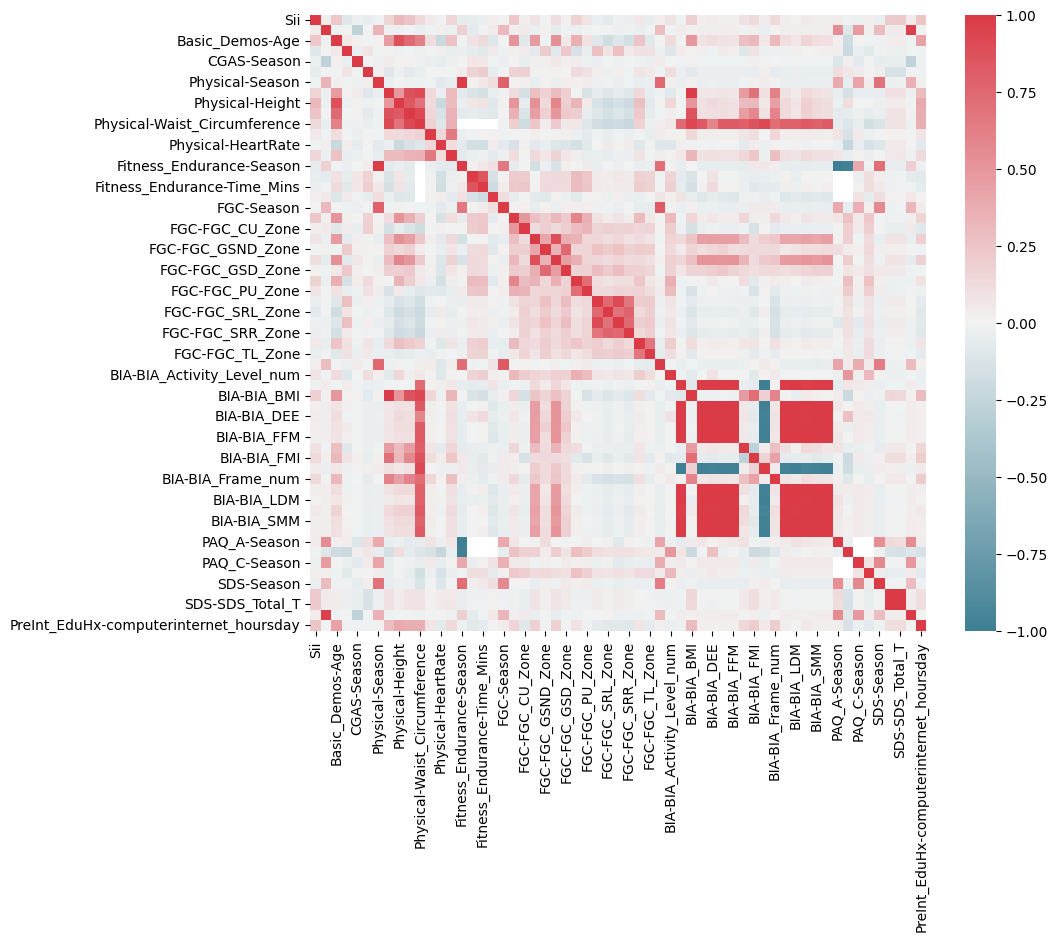

In [15]:
# Calcolo matrice di correlazione (con il target)
X_temp = X_train_final.copy()
X_temp.insert(0, column="Sii", value=y_train_final)

f, ax = plt.subplots(figsize=(10, 8))
corr = X_temp.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

C:\Users\Dav\AppData\Local\Temp\ipykernel_2392\996797608.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance_cv_sorted, y=feat_importance_cv_sorted.index, palette="viridis")


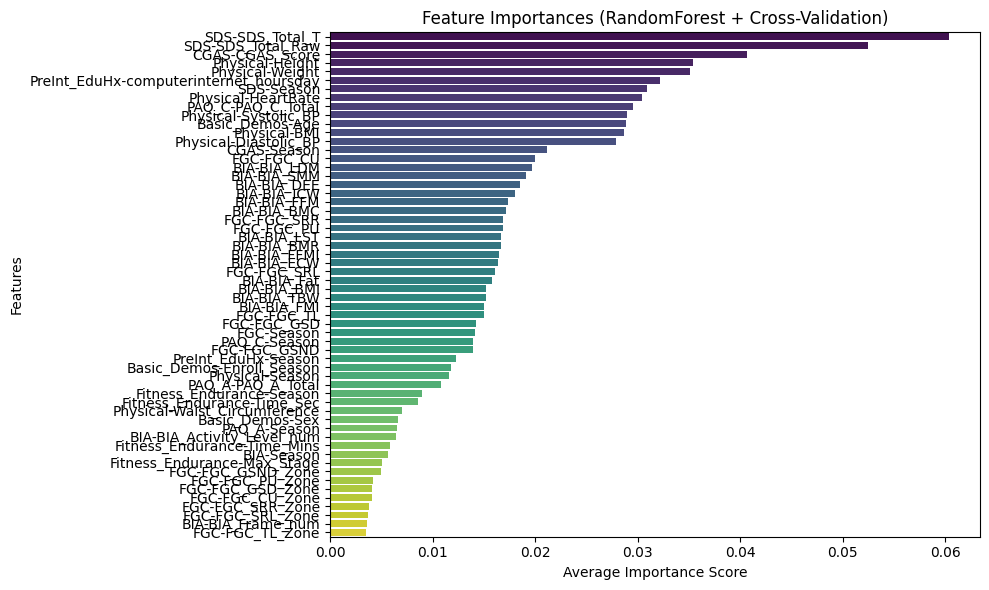

In [16]:
# cross validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
importances_list = []

for train_idx, val_idx in kf.split(X_train_final, y_train_final):
    X_fold_train, y_fold_train = X_train_final.iloc[train_idx], y_train_final.iloc[train_idx]
    
    model = RandomForestClassifier(random_state=SEED)
    model.fit(X_fold_train, y_fold_train)
    
    importances_list.append(model.feature_importances_)

# Media delle importanze sui fold
mean_importances = np.mean(importances_list, axis=0)

# Associa nomi feature
feat_importance_cv = pd.Series(mean_importances, index=X_train_final.columns)
feat_importance_cv_sorted = feat_importance_cv.sort_values(ascending=False)

# Visualizza
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance_cv_sorted, y=feat_importance_cv_sorted.index, palette="viridis")
plt.title("Feature Importances (RandomForest + Cross-Validation)")
plt.xlabel("Average Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

Si nota immediatamente quanto questo grafico sia diverso da quello visto in precedenza: l'importance score è in generale molto più basso e decisamente meno sbilanciato di prima.

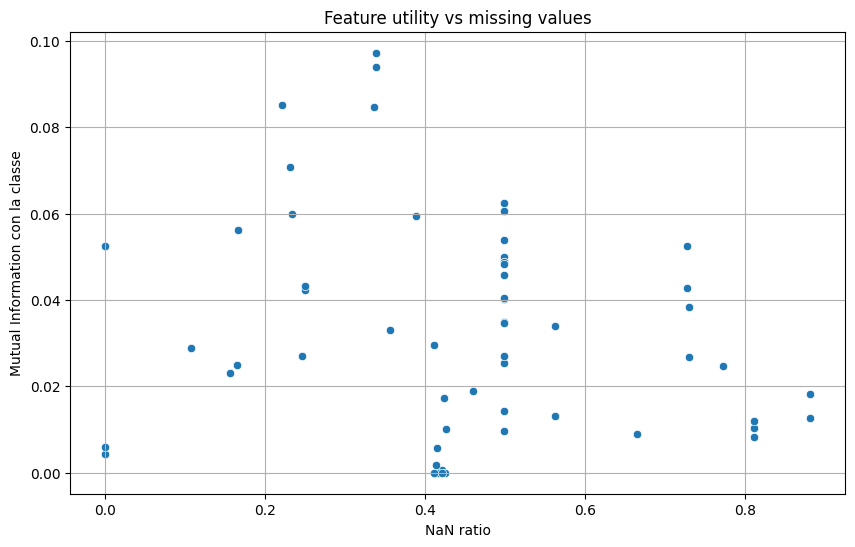

In [17]:
X_train_mi = X_train_final.copy()
Y_train_mi = y_train_final.copy() 

mi = mutual_info_classif(X_train_mi.fillna(-9999), Y_train_mi) # non gestisce in automatico i NaN

mi_series = pd.Series(mi, index=X_train_mi.columns)

nan_ratio = X_train_mi.isnull().mean()

# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=nan_ratio, y=mi_series)
plt.xlabel("NaN ratio")
plt.ylabel("Mutual Information con la classe")
plt.title("Feature utility vs missing values")
plt.grid(True)
plt.show()

Vediamo che ci sono alcune features con NaN ratio molto alto, che sono poco significative. Ci sono poi alcune features che hanno una MI con la label quasi nulla. Controlliamo quali sono:

In [18]:
# creo un dataframe temporaneo per visualizzare le feature con NaN ratio > 0.8 e la loro mutual information
nan_1_df = pd.DataFrame({
    'NaN ratio': nan_ratio[nan_ratio > 0.8],
    'Mutual Info': mi_series[nan_ratio > 0.8]
}).sort_values(by='NaN ratio', ascending=False)

print("Feature con NaN ratio > 0.8:")
print(nan_1_df)

mi_high_sorted = mi_series[mi_series > 0.06].sort_values(ascending=False)
print("\nFeature con alta mutual information, ordinate in modo decrescente:")
print(mi_high_sorted)

Feature con NaN ratio > 0.8:
                             NaN ratio  Mutual Info
PAQ_A-PAQ_A_Total             0.881313     0.012730
PAQ_A-Season                  0.881313     0.018190
Fitness_Endurance-Time_Sec    0.811869     0.008267
Fitness_Endurance-Time_Mins   0.811869     0.012040
Fitness_Endurance-Max_Stage   0.810922     0.010251

Feature con alta mutual information, ordinate in modo decrescente:
SDS-SDS_Total_T      0.097275
SDS-SDS_Total_Raw    0.094002
Physical-Weight      0.085147
SDS-Season           0.084694
Physical-Height      0.070808
BIA-BIA_LDM          0.062577
BIA-BIA_ICW          0.060582
dtype: float64


Le features con NaN ratio alto non sono in assoluto quelle con importance minore, ma sono comunque nella bassa classifica, come atteso. Ugualmente alta mutual information corrisponde ad alta importance.
Data questa conferma, possiamo proseguire con l'eliminazione delle features meno significative



### Feature subset selection by elimination

Dopo aver ottenuto le importanze delle feature via Random Forest con cross-validation e aver avuto conferma dei dati anche con un secondo metodo, possiamo procedere con una selezione backward. L’idea è semplice: partiamo dal set completo di feature e rimuoviamo iterativamente quella meno importante (in base alla feature importance). A ogni rimozione, valutiamo le performance del modello su un set di validazione.

Questo approccio ha un vantaggio interessante: quando due feature sono molto correlate, la Random Forest tende a "dividersi" l’importanza tra le due, facendo sembrare ognuna meno utile individualmente. Con la backward elimination, però, appena una delle due viene rimossa, l’importanza dell’altra può impennarsi e rivelarsi cruciale. In pratica: il metodo compensa la penalizzazione delle feature ridondanti.

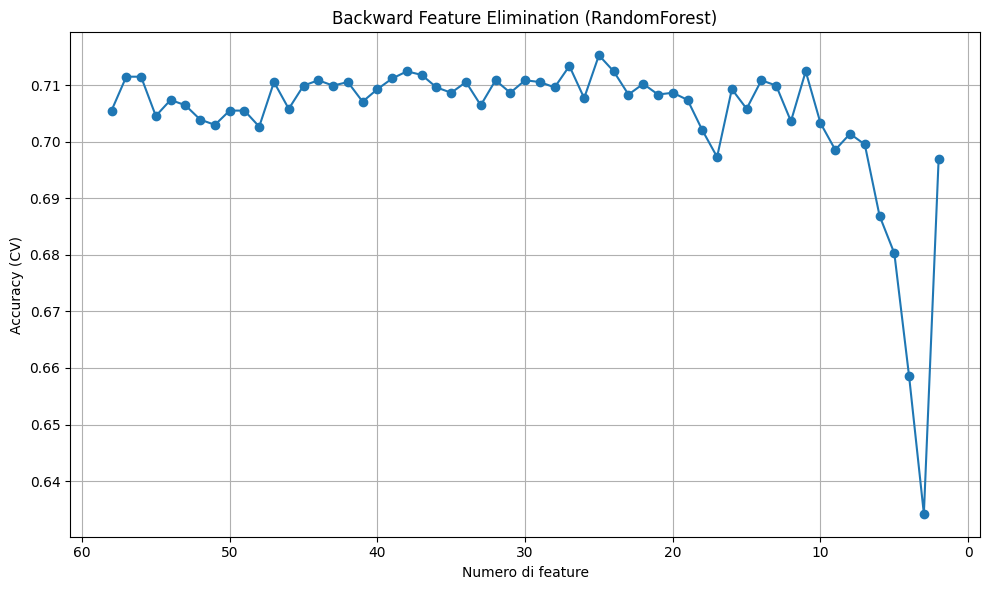

In [19]:
from sklearn import clone
from sklearn.model_selection import cross_val_score


X_be = X_train_final.copy()
y_be = y_train_final.copy()
features = list(feat_importance_cv_sorted.index)

# Setup modello base
base_model = RandomForestClassifier(random_state=SEED)

# Per salvare l’andamento delle performance
scores = []
n_features = []

# Loop backward
while len(features) > 1:
    # Modello con feature correnti
    X_current = X_be[features]
    
    score = cross_val_score(clone(base_model), X_current, y_be, cv=5, scoring='accuracy').mean()
    scores.append(score)
    n_features.append(len(features))
    
    # Rimuovi la feature meno importante tra quelle rimaste
    feat_importance_sub = feat_importance_cv[features]
    worst_feature = feat_importance_sub.idxmin()
    features.remove(worst_feature)

# Visualizzazione andamento performance
plt.figure(figsize=(10, 6))
plt.plot(n_features, scores, marker='o')
plt.xlabel("Numero di feature")
plt.ylabel("Accuracy (CV)")
plt.title("Backward Feature Elimination (RandomForest)")
plt.gca().invert_xaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


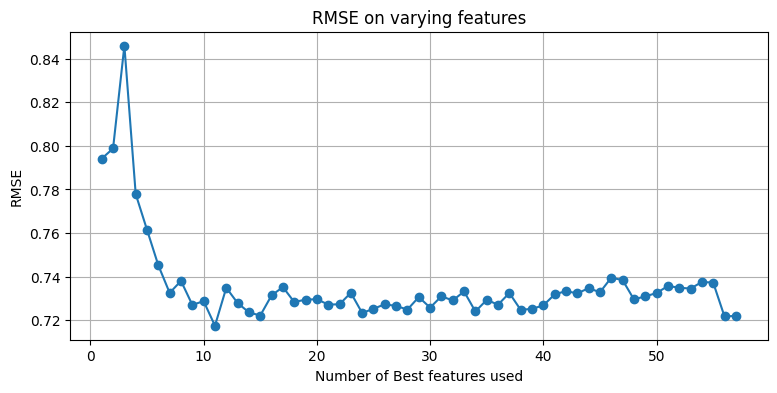

In [20]:
rmse = []
for f in range (1, len(feat_importance_cv_sorted)):
    rf_small = RandomForestClassifier(random_state=SEED)
    scores = cross_val_score(
        rf_small, 
        X_train_final[feat_importance_cv_sorted.index[:f]],
        y_train_final,
        cv=5,
        scoring='neg_root_mean_squared_error'  # Usando RMSE come metrica
    )
    rmse.append(-scores.mean())  # Negativo perché cross_val_score restituisce valori negativi per le metriche di errore

fig, ax = plt.subplots(figsize=(9,4))
ax.plot(range(1,len(feat_importance_cv_sorted)), rmse, 'o-', label="RMSE")
ax.set_title("RMSE on varying features")
ax.set_xlabel("Number of Best features used")
ax.set_ylabel("RMSE")
ax.grid();

In [21]:
# Mostra le prime 11 feature
top11_features = feat_importance_cv_sorted.index[:11].tolist()
print("Top 11 features (RandomForest CV):")
for i, f in enumerate(top11_features, 1):
    print(f"{i}. {f}")

# droppa le altre
X_train_final = X_train_final[top11_features].copy()

Top 11 features (RandomForest CV):
1. SDS-SDS_Total_T
2. SDS-SDS_Total_Raw
3. CGAS-CGAS_Score
4. Physical-Height
5. Physical-Weight
6. PreInt_EduHx-computerinternet_hoursday
7. SDS-Season
8. Physical-HeartRate
9. PAQ_C-PAQ_C_Total
10. Physical-Systolic_BP
11. Basic_Demos-Age


# Modello Base per il confronto con gli altri modelli.
Uno dei modelli più semplici che si possono utilizzare per eseguire delle predizioni è la moda.

In [22]:
from sklearn.metrics import accuracy_score


y_train_mode = y_train_final.mode()[0]

# Predizione costante sul test
y_pred_base = [y_train_mode] * len(y_test)

# Accuracy baseline
base_accuracy = accuracy_score(y_test, y_pred_base)
print("Baseline accuracy:", base_accuracy)


Baseline accuracy: 0.572744014732965


Posso usare una confusion matrix per avere un modello base per fare un benchmark di partenza

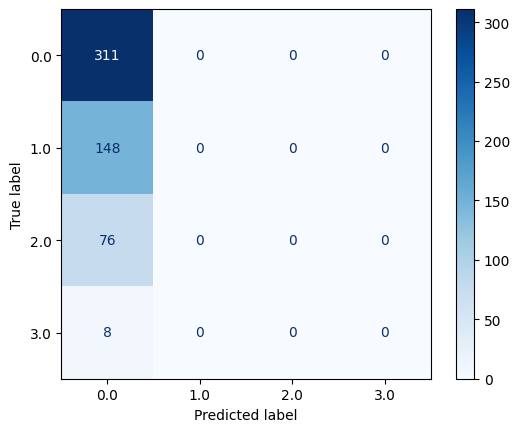

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_base)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(set(y_test)))
disp.plot(cmap=plt.cm.Blues)
plt.show()


Si può notare che utilizzando la statistica della moda,il nostro modello ottiene il 57% delle predizioni corrette.
Il nostro obbiettivo è quindi di trovare quei modelli che permettano di migliorare le predizioni in particolare per quei valori di Sii come 3.0 la cui distribuzione è significativamente minore rispetto alle altre.

# MODELLO 2: RETE NEURALE CON KERAS
Ovvio che in generale vogliamo avere un'accuracy molto alta. Le classi però sono fortemente sbilanciate e, essendo un test medico, è essenziale minimizzare il numero di falsi negativi della categoria 3 (corrispondente a "severe"). Infatti, un falso positivo è meno problematico, in quanto dopo la predizione con il modello, si può eseguire un test reale sulla persona. In caso di un falso negativo, invece, si scarta a priori l'ipotesi ed è più improbabile che venga effettuato un ulteriore test. 

### Dati
I dati che useremo sono quelli creati nella prima sezione del documento.
* `X_train_final` e `y_train_final`: rispettivamente sono le features e la label dei dati di train, aumentati di circa 1000 righe con l'imputazione dell'sii mancante.
* `X_test` e `y_test`: come sopra, per il test. Non hanno righe NaN.



In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, recall_score

tf.random.set_seed(SEED)

### label encoding
Keras per classificazione multi-classe con loss `sparse_categorical_crossentropy`, richiede che queste classi siano codificate come interi da 0 a `n - 1` senza salti, quindi dobbiamo convertire gli attuali valori, float64, in int

In [25]:
y_train_final = y_train_final.astype(int)
y_test = y_test.astype(int)

Il test **non verrà mai usato** se non alla fine, per valutare le performance del modello. La calibrazione degli iperparametri verrà quindi eseguita usando un *validation set*, in particolare di tipo *stratified*, così da avere la stessa proporzione delle classi tra train e validation, fondamentale nel caso di dati sbilanciati come i nostri.

avendo un dataset abbastanza grande, ma pochissimi esempi della classe 3, non posso prendere un validation troppo piccolo. divido 60% training e 40% validation

Quantità di esempi per ogni classe nel training set:
sii
0    1354
1     349
2     181
3      16
Name: count, dtype: int64
Quantità di esempi per ogni classe nel validation set:
sii
0    904
1    233
2    121
3     10
Name: count, dtype: int64


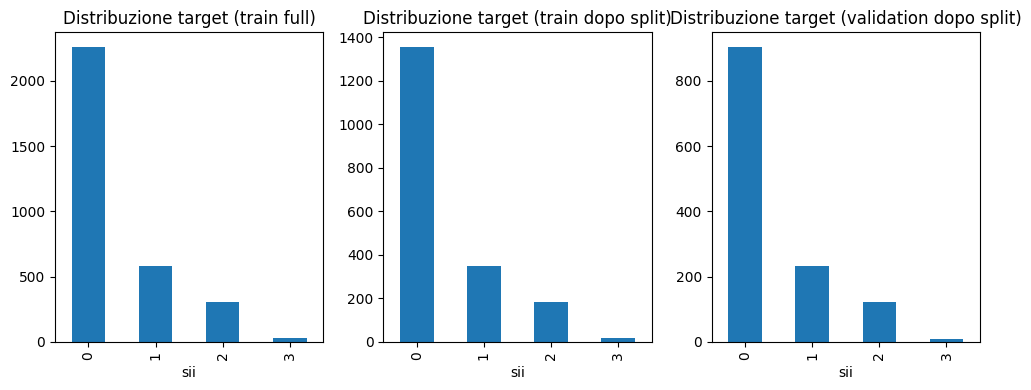

In [26]:
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_final, y_train_final,
    test_size=0.40,
    stratify=y_train_final,
    random_state=SEED
)

# X_tr.shape 1900 righe, 11 colonne
# X_val.shape 1268 righe, 11 colonne

# conto quantità di esempi per ogni classe del trining
class_counts = y_tr.value_counts().sort_index()
print("Quantità di esempi per ogni classe nel training set:")
print(class_counts)
# conto quantità di esempi per ogni classe della validation
class_counts_val = y_val.value_counts().sort_index()
print("Quantità di esempi per ogni classe nel validation set:")
print(class_counts_val)

# purtroppo, pochissimi esempi della classe 3

# controllo visivo sulla distribuzione delle classi
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
y_train_final.value_counts().sort_index().plot(kind='bar', title='Distribuzione target (train full)')
plt.subplot(1,3,2)
y_tr.value_counts().sort_index().plot(kind='bar', title='Distribuzione target (train dopo split)')
plt.subplot(1,3,3) 
y_val.value_counts().sort_index().plot(kind='bar', title='Distribuzione target (validation dopo split)')
plt.tight_layout() # per evitare sovrapposizioni
plt.show()


### Normalizzazione dei dati di training (features) con StandardScaler di scikit-learn.
standardizza le feature rimuovendo la media e scalando alla varianza unitaria:
$ z = \frac{x - \mu}{\sigma} $.
Per ora, tutti i NaN li imposto a -9999. valore che ovviamente non c'entra nulla con i dati. Dopodiché vedremo se necessario di imputarli in qualche modo.

In [27]:
scaler = StandardScaler()

# uso il train per calcolare media e deviazione standard, e standardizzo tutto (train, val, test)

X_tr_filled = X_tr.fillna(-9999).copy() 
X_val_filled = X_val.fillna(-9999).copy()  

X_tr_scaled = scaler.fit_transform(X_tr_filled)    
X_val_scaled = scaler.transform(X_val_filled)

### Assegnazione pesi alle labels
Essendo un dataset sbilanciato, è necessario dare un peso ad ogni classe, altrimenti il modello ricalcherà molto bene solo la classe più frequente. Assegno quindi dei pesi in automatico (balanced significa proporzionale) alle varie classi.
Come detto in precedenza, ciò a cui puntiamo è la massimizzazione della recall sulla classe 3. Ciò significa che, probabilmente, dopo il peso di quest'ultima dovà essere arbitrariamente aumentato, perché il modello riesca a prendere più informazione specifica

I pesi vengono applicati direttamente alla loss per ogni esempio. Servono per dire al modello: “Se sbagli questa classe, è molto più grave”.

In [28]:
classes = np.unique(y_tr) # array delle classi presenti nel training set
num_classes = len(classes)

auto_weights = compute_class_weight(class_weight='balanced',
                                    classes=classes,
                                    y=y_tr)
class_weights = {cls: w for cls, w in zip(classes, auto_weights)}

print("Class weights:", class_weights)

Class weights: {np.int64(0): np.float64(0.35081240768094535), np.int64(1): np.float64(1.3610315186246418), np.int64(2): np.float64(2.6243093922651934), np.int64(3): np.float64(29.6875)}


### Costruzione del modello neurale (`build_model`)

In questa funzione definiamo in modo flessibile l’architettura della rete neurale feed-forward da utilizzare per la classificazione.  
L’input è costituito da `n_features` (pari al numero di variabili predittive dopo la pulizia e la selezione), mentre l’output ha `n_classes` neuroni, uno per ciascuna classe di severità.

L’architettura è personalizzabile passando:
- **`hidden_units`**: lista con il numero di neuroni in ciascun layer nascosto (default `[64, 32]`).
- **`activation`**: funzione di attivazione per i layer nascosti (default `ReLU`).
- **`dropout`**: percentuale di neuroni disattivati casualmente durante il training per ridurre l’overfitting.
- **`l2_reg`**: parametro di regolarizzazione L2 per penalizzare pesi troppo grandi. smorza un po' l'effetto dei pesi per evitare l'overfitting. Inizialmente viene impostato a 0 -> nessuna regolarizzazione
- **`lr`**: learning rate dell’ottimizzatore Adam.

La funzione crea i layer nascosti in un ciclo, applica eventuale dropout, e definisce il layer di output:
- **Softmax + `sparse_categorical_crossentropy`** per il caso multiclasse (più di due classi).
- **Sigmoid + `binary_crossentropy`** per il caso binario.

In [44]:
def build_model(n_features,
                n_classes = num_classes,
                hidden_units=[64,32],
                activation='relu',
                lr=1e-3,
                dropout=0.0,
                l2_reg=0.0,
                loss_case_binary = "binary_crossentropy",
                loss_case_multiclass = "sparse_categorical_crossentropy",
                loss_case_regression="mse",
                metrics=['accuracy', ]):
    
    # Definisce il layer di input, dimensione = numero di feature
    inputs = layers.Input(shape=(n_features,))
    
    x = inputs    # Variabile temporanea per "costruire" i layer successivi
    for units in hidden_units:
        
        x = layers.Dense(units, # denso -> fully-connected
                         activation = activation,
                         kernel_regularizer = keras.regularizers.l2(l2_reg))(x) # l2_reg
        if dropout and dropout > 0.0: 
            x = layers.Dropout(dropout)(x) # applico il dropout
    if n_classes == None:
        out = layers.Dense(1, activation='linear')(x)
        loss = loss_case_regression
    elif n_classes <= 2: # classificazione binaria
        out = layers.Dense(1, activation='sigmoid')(x)
        loss = loss_case_binary
    else: # classificazione multiclasse
        out = layers.Dense(n_classes, activation='softmax')(x)
        loss = loss_case_multiclass

    

    model = keras.Model(inputs=inputs, outputs=out)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                  loss=loss,
                  metrics=metrics)
    
    return model

### Baseline "evoluta": rete neurale semplice

Addestriamo una prima versione della rete neurale costruita in precedenza (`build_model`) per stabilire un punto di riferimento con cui confrontare le successive prove. Ovviamente ci si aspetta che l'accuracy sia migliore della baseline trovata con la moda. Notare però che in questo caso non possiamo usare i dati di test, perché faremmo tuning dei parametri su quelli, dobbiamo invece usare il validation.

- **EarlyStopping**: interrompiammo il training se la loss di validazione non migliora per un certo numero di epoche, evitando overfitting.
- **ReduceLROnPlateau** per ridurre il learning rate se la loss di validazione si stabilizza, migliorando la convergenza.
Il training è ponderato con `class_weight` per dare più importanza alle classi meno rappresentate, in particolare la classe 3.

In [96]:
# -----------------------------------------------
# Costruisco la funzione per eseguire il modello
# -----------------------------------------------


""""
_num_features: int, numero di feature in input
_num_classes: int, numero di classi in output (None per regressione)
hidden_units: lista di interi, numero di neuroni per layer nascosti
activation: stringa, funzione di attivazione da usare nei layer nascosti
lr: float, learning rate iniziale
dropout: float, percentuale di dropout da applicare
l2_reg: float, coefficiente di regolarizzazione L2
patience_early_stopping: int, numero di epoche senza miglioramento prima di fermare l'allenamento
patience_reduce_lr: int, numero di epoche senza miglioramento prima di ridurre il learning rate
factor: float, fattore di riduzione del learning rate se la loss di validazione non migliora
min_lr: float, learning rate minimo a cui ridurre
epochs: int, numero massimo di epoche per l'allenamento
batch_size: int, numero di campioni per batch
loss_case_binary: stringa, funzione di loss da usare per il caso binario
loss_case_multiclass: stringa, funzione di loss da usare per il caso multiclasse
loss_case_regression: stringa, funzione di loss da usare per il caso di regressione
metrics: lista di stringhe, metriche da usare per valutare il modello

"""
def esegui_modello (X=X_tr_scaled, Xv=X_val_scaled,  _num_features = n_features, _num_classes = num_classes, hidden_units=[64,32], activation='relu', lr=1e-4, dropout=0, l2_reg=0, patience_early_stopping = 50, patience_reduce_lr = 6, factor = 0.5, min_lr=1e-6, epochs = 500, batch_size=32, loss_case_binary = "binary_crossentropy", loss_case_multiclass = "sparse_categorical_crossentropy", loss_case_regression="mse", metrics=['accuracy', ]):
    # ----------------------
    # modellazione effettiva
    # ----------------------
    model = build_model(
        n_features=_num_features,          # input
        n_classes=_num_classes,          # output
        hidden_units=hidden_units,      # due con 64 e 32 neuroni
        activation=activation,          # f di attivazione
        lr=lr,                          # learning rate iniziale
        dropout=dropout,                # dropout inizialmente 0
        l2_reg=l2_reg,                 # regolarizzazione L2 idem
        loss_case_binary=loss_case_binary,  # loss per caso binario
        loss_case_multiclass=loss_case_multiclass,  # loss per caso multiclasse
        loss_case_regression=loss_case_regression,  # loss per caso regressione
        metrics=metrics,                # metriche da usare
    )

    callbacks = [
        # early stop se la loss di validazione non migliora per tot epoche consecutive
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience_early_stopping, restore_best_weights=True),

        # Se la loss di validazione non migliora per tot epoche, riduce il learning rate del factor%
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience_reduce_lr, min_lr=min_lr)
    ]

    history = model.fit(
        X,
        y_tr,
        validation_data=(Xv, y_val),
        epochs=epochs, 
        batch_size=batch_size, # numero di campioni per batch
        class_weight=class_weights, # pesi classi
        callbacks=callbacks, 
        verbose=1
    )


    # ----------------------
    # risultati
    # ----------------------

    print("training terminato")

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Loss per epoca'); plt.legend()

    # Se è regressione, grafico MAE invece che accuracy
    if num_classes > 0:
        plt.subplot(1,2,2)
        plt.plot(history.history['accuracy'], label='train acc')
        plt.plot(history.history['val_accuracy'], label='val acc')
        plt.title('Accuracy per epoca'); plt.legend()
    else:
        if 'mae' in history.history:
            plt.subplot(1,2,2)
            plt.plot(history.history['mae'], label='train MAE')
            plt.plot(history.history['val_mae'], label='val MAE')
            plt.title('MAE per epoca'); plt.legend()
    plt.show()       

    # Predizioni di probabilità sul validation set
    y_val_pred_proba = model.predict(Xv)

    # Conversione da probabilità a classe predetta
    if _num_classes == None:
        y_val_pred = np.rint(y_val_pred_proba).astype(int).ravel()
        y_val_pred = np.clip(y_val_pred, 0, 3)
    elif _num_classes <= 2:
        # Caso binario: threshold 0.5
        y_val_pred = (y_val_pred_proba.ravel() >= 0.5).astype(int)
    else:
        # Caso multiclasse: argmax
        y_val_pred = np.argmax(y_val_pred_proba, axis=1)
    

    # --- Report di classificazione ---
    print("Classification report (validation):")
    print(classification_report(y_val, y_val_pred, digits=4))

    # --- Confusion matrix ---
    cm = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')        # asse X: predizioni
    plt.ylabel('True')             # asse Y: valori reali
    plt.title('Confusion Matrix (validation)')
    plt.show()

    if _num_classes and _num_classes > 1:
        # --- Recall specifico per classe 3 ---
        rec_severe = recall_score(y_val, y_val_pred, labels=[3], average='macro')
        print(f"Recall classe severe (3): {rec_severe:.4f}")

        # --- Precision-Recall curve per classe 3 ---
        y_true_bin = (y_val == 3).astype(int)
        y_scores_severe = y_val_pred_proba[:, 3]
        prec, rec, thresh = precision_recall_curve(y_true_bin, y_scores_severe)
        ap = average_precision_score(y_true_bin, y_scores_severe)
        plt.figure(figsize=(6,5))
        plt.plot(rec, prec, label=f'PR curve (severe), AP={ap:.3f}')
        plt.xlabel('Recall'); plt.ylabel('Precision')
        plt.title('Precision-Recall (classe severe)')
        plt.legend(); plt.grid(); plt.show()


### Visualizzazione dell’andamento del training

Tracciamo i grafici dell’andamento di **loss** e **accuracy** durante il training e la validazione.  
Questi grafici sono utili per:
- individuare il momento in cui il modello smette di migliorare (*early stopping point*);
- verificare se c’è overfitting (gap crescente tra train e validation);
- valutare la stabilità della curva di apprendimento.

### Valutazione del modello sul set di validazione

Eseguiamo poi la predizione sul set di validazione e calcoliamo le metriche di valutazione:
- **Classification report**: precision, recall e f1-score per ciascuna classe.
- **Confusion matrix**: visualizzazione degli errori e delle corrette classificazioni.
- **Recall della classe 3 ("severe")**: metrica prioritaria in questo progetto.

## Esecuzione modello semplice


Numero di feature: 11
Numero di classi: 4
NaN in X_tr_scaled: False
Inf in X_tr_scaled: False
NaN in X_val_scaled: False
Inf in X_val_scaled: False
Classi uniche in y_tr: [0 1 2 3]
Epoch 1/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2811 - loss: 1.4640 - val_accuracy: 0.2847 - val_loss: 1.3012 - learning_rate: 1.0000e-04
Epoch 2/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2858 - loss: 1.4202 - val_accuracy: 0.2950 - val_loss: 1.2846 - learning_rate: 1.0000e-04
Epoch 3/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3142 - loss: 1.3843 - val_accuracy: 0.2989 - val_loss: 1.2709 - learning_rate: 1.0000e-04
Epoch 4/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3726 - loss: 1.3541 - val_accuracy: 0.3991 - val_loss: 1.2578 - learning_rate: 1.0000e-04
Epoch 5/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4584 - loss: 1.3303 - val_accuracy: 0.4495 - val_loss: 1.2440 - learning_rate: 1.0000e-04
Epoch 6/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7

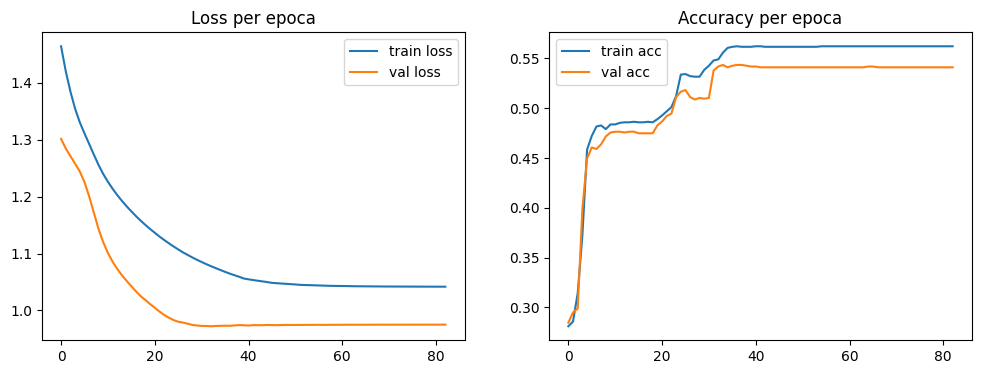

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification report (validation):
              precision    recall  f1-score   support

           0     0.8946    0.6383    0.7450       904
           1     0.2547    0.3519    0.2955       233
           2     0.2360    0.1736    0.2000       121
           3     0.0330    0.7000    0.0631        10

    accuracy                         0.5418      1268
   macro avg     0.3546    0.4659    0.3259      1268
weighted avg     0.7073    0.5418    0.6050      1268



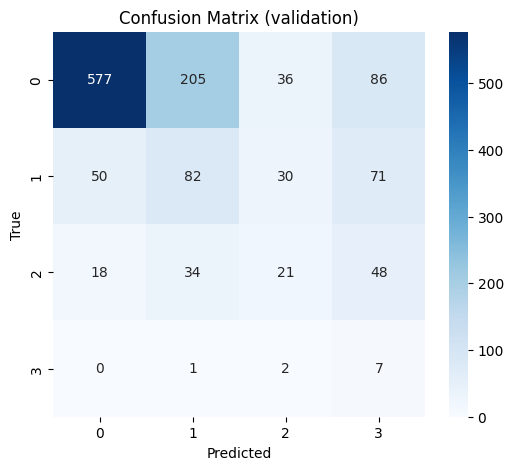

Recall classe severe (3): 0.7000


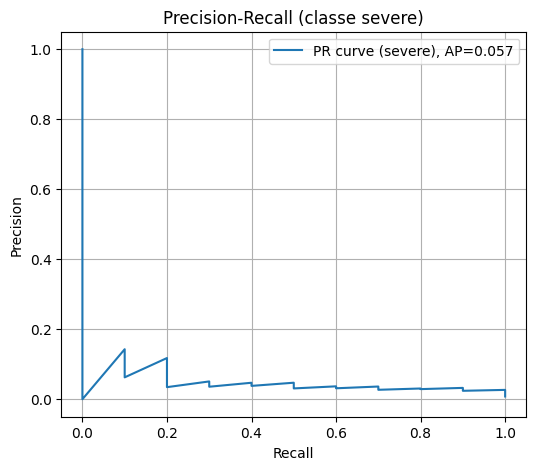

In [ ]:
n_features = X_tr_scaled.shape[1]
print("Numero di feature:", n_features)
print("Numero di classi:", num_classes)
print("NaN in X_tr_scaled:", np.isnan(X_tr_scaled).any())
print("Inf in X_tr_scaled:", np.isinf(X_tr_scaled).any())
print("NaN in X_val_scaled:", np.isnan(X_val_scaled).any())
print("Inf in X_val_scaled:", np.isinf(X_val_scaled).any())
print("Classi uniche in y_tr:", np.unique(y_tr))

# eseguiamo il modello con i parametri di default
esegui_modello()

## considerazioni sul modello

### metriche di valutazione

Ricordiamo cosa sono le varie metriche utilizzate: 

* **Accuracy**: $ = \frac{TP + TN}{TP + TN + FP + FN} $. Percentuale di predizioni corrette sul totale. Con dataset sbilanciati può essere fuorviante: basta indovinare sempre la classe più frequente per avere un valore alto
* **Precision** $ = \frac{TP}{TP + FP} $. Quanti tra i predetti positivi sono davvero positivi. Alta precisione significa pochi falsi positivi.  
* **Recall** $ = \frac{TP}{TP + FN} $ Quanti tra i positivi reali sono stati riconosciuti. Alta recall significa pochi falsi negativi.  

Se ci limitassimo a massimizzare solo la recall, basterebbe predire sempre “positivo”: in questo modo i falsi negativi sarebbero zero e la recall diventerebbe 1. Allo stesso modo, se cercassimo solo la massima precisione, potremmo predire “positivo” solo in casi rarissimi, riducendo i falsi positivi a zero. Entrambe le metriche, quindi, da sole sono inutili, serve un bilanciamento.

* **F1-score**  $ = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $. È la media armonica tra precision e recall. Fornisce un compromesso tra i due valori e penalizza gli squilibri estremi. Utile soprattutto con dataset sbilanciati come il nostro.
* **Macro average e Weighted average**:
  - *Macro avg*: media aritmetica delle metriche per ogni classe, tratta tutte le classi in modo uguale. Evidenzia i problemi sulle classi piccole.  
  - *Weighted avg*: media pesata sul supporto. Un po' "pericolosa", può risultare alta anche se il modello fallisce completamente sulle classi piccole.

Il **supporto** non è una metrica, è il numero di esempi presenti in ogni classe nel set di valutazione. Notare che la classe 3 del validation ha solo 3 elementi.

### interpretazioni

Dai grafici si vede che la rete si è praticamente piantata:  
- la *val loss* resta attorno a 1 dopo poche epoche e non scende più,  
- l’accuracy si blocca intorno al 53-55% sia su train che su validation,  
- il learning rate è stato ridotto fino al minimo senza sbloccare la situazione.  

In particolare:
- la classe 0 ha precisione molto alta (0.91) ma recall 0.63, quindi molti esempi finiscono confusi altrove, essendo la classe maggioritaria non c'è da stupirsi che comunque abbia delle metriche buone.
- la classe 1 viene riconosciuta a tratti (recall ~0.4) ma con precisione molto bassa 
- la classe 2 quasi sempre persa (recall 0.14, F1 0.17)
- la classe 3 (severe, quella più critica) ha recall 0.7 ma precisione ridicola, significa che la rete la assegna a casi sbagliati (infatti vediamo 156 elementi "true 0" o "true 1" classificati come 3)
Il risultato complessivo è che l’accuracy globale e dominata dala classe 0, mentre macro-F1 è pessima (< 0.32), Si può quindi affermare che il modello non ha imparato nulla. 

### possibili passi futuri

- aumentare i pesi delle classi più rare (2 e soprattutto 3), così che incidano molto di più nella funzione di loss;  
- provare ad aumentare la capacità del modello (più neuroni e/o layer in più) e inserire un po’ di regolarizzazione (dropout o L2);  
- bilanciare meglio il dataset tramite oversampling/duplicazione delle classi 2 e 3, per permettere alla rete di vederle più spesso;
- imputare i valori inizialmente NaN, che adesso hanno un valore simbolico -9999

possiamo riutilizzare la funzione, cambiandone i parametri


### Tuning dei parametri e augmentation dei dati
La prima cosa che faccio è sistemare i valori NaN. Infatti, sostituirli con un placeholder come -9999 è solo un “trucco” per far girare il modello, ma non aggiunge nessuna informazione utile e anzi rischia di introdurre rumore. Un modo banale sarebbe utilizzare uno tra media, moda o mediana, ma c'è il rischio di inserire dati che oggettivamente non c'entrano nulla, finendo per far imparare pattern sbagliati al modello. Proseguo quindi utilizzando la distanza basata sulla Random Forest, che tenendo conto della relazione tra variabili permette di assegnare valori più probabilmente giusti. Magari sbagliati, ma sicuramente migliori delle altre metriche. Ovviamente come sempre i dati di test non vanno toccati. Rieseguito il modello senza toccarne i parametri, ottengo questi risultati:

In [34]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Imputazione dei valori mancanti
# Usando IterativeImputer con RandomForestRegressor come estimatore
imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=50, random_state=SEED),
    max_iter=10,
    random_state=SEED
)

X_tr_imputed = imputer.fit_transform(X_tr) # li chiamo allo stesso modo di prima così da non dover cambiare il resto del codice
X_val_imputed = imputer.transform(X_val)

# eseguo quindi la standardizzazione
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

n_features = X_tr_scaled.shape[1]
print("Numero di feature:", n_features)
print("Numero di classi:", num_classes)
print("NaN in X_tr_scaled:", np.isnan(X_tr_scaled).any())
print("Inf in X_tr_scaled:", np.isinf(X_tr_scaled).any())
print("NaN in X_val_scaled:", np.isnan(X_val_scaled).any())
print("Inf in X_val_scaled:", np.isinf(X_val_scaled).any())
print("Classi uniche in y_tr:", np.unique(y_tr))


C:\Users\Dav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Numero di feature: 11
Numero di classi: 4
NaN in X_tr_scaled: False
Inf in X_tr_scaled: False
NaN in X_val_scaled: False
Inf in X_val_scaled: False
Classi uniche in y_tr: [0 1 2 3]


Epoch 1/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1889 - loss: 1.4199 - val_accuracy: 0.1932 - val_loss: 1.4500 - learning_rate: 1.0000e-04
Epoch 2/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1911 - loss: 1.3754 - val_accuracy: 0.1995 - val_loss: 1.4186 - learning_rate: 1.0000e-04
Epoch 3/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1984 - loss: 1.3411 - val_accuracy: 0.2303 - val_loss: 1.3932 - learning_rate: 1.0000e-04
Epoch 4/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2326 - loss: 1.3130 - val_accuracy: 0.2634 - val_loss: 1.3717 - learning_rate: 1.0000e-04
Epoch 5/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2905 - loss: 1.2894 - val_accuracy: 0.3115 - val_loss: 1.3520 - learning_rate: 1.0000e-04
Epoch 6/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3395 - loss: 1.2693 - val_accuracy: 0.3683 - val_loss: 1.3341 - learning_rate: 1.0000e-04
Epoch 7/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.386

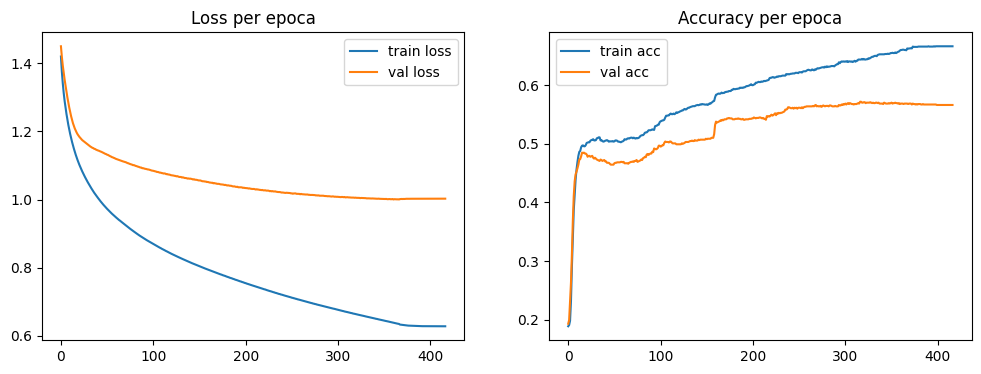

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification report (validation):
              precision    recall  f1-score   support

           0     0.8679    0.6394    0.7363       904
           1     0.2708    0.3348    0.2994       233
           2     0.2258    0.5207    0.3150       121
           3     0.0571    0.2000    0.0889        10

    accuracy                         0.5686      1268
   macro avg     0.3554    0.4237    0.3599      1268
weighted avg     0.6905    0.5686    0.6107      1268



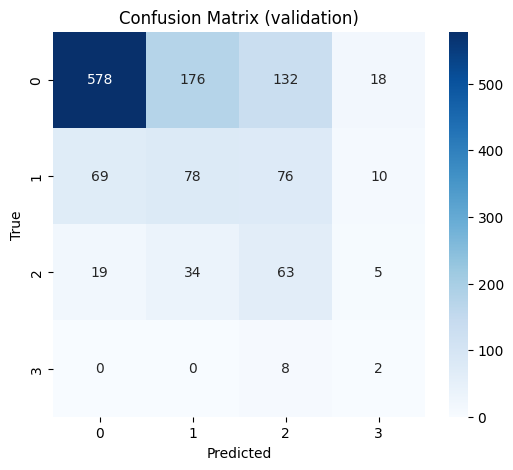

Recall classe severe (3): 0.2000


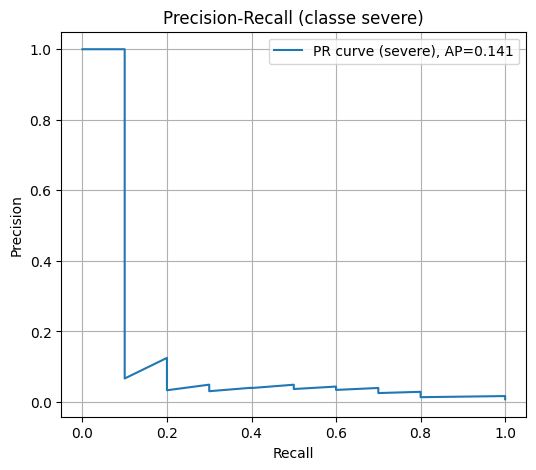

In [35]:
# rieseguo il modello con i dati imputati e standardizzati, sempre con i parametri di default
esegui_modello()


Rispetto al modello con `-9999`: 

- l'andamento delle accuracy per le varie epoche è più regolare
- sulla diagonale principale della confusion matrix vediamo subito un nettissimo miglioramento per la classe 2, mentre le altre 3 si nota un piccolo degrado delle prestazioni
- sempre guardando la confusion matrix, ci sono molte meno predizioni di classe 3, come numero assoluto, e molte di più della classe 2. Un lato positivo è che la di "true 3" nessuna è stata predetta come 0 o 1, e in un test medico è un buon risultato.
- la classe 0 resta la più riconosciuta, più o meno invariata anche se in leggero peggioramento  
- la classe 1 resta problematica 
- l'F1-score delle classi 2 e 3 migliora

in generale abbiamo avuto un leggero miglioramento, ma c'è ancora molto da fare.
Proviamo ora a modificare un po' i parametri della rete neurale. Userò una sola cella di codice, e in quella successiva metto i risultati mano a mano


{np.int64(0): np.float64(0.35081240768094535), np.int64(1): np.float64(1.3610315186246418), np.int64(2): np.float64(2.6243093922651934), np.int64(3): np.float64(29.6875)}
Epoch 1/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1889 - loss: 1.4359 - val_accuracy: 0.3880 - val_loss: 1.3802 - learning_rate: 0.0010
Epoch 2/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4100 - loss: 1.2860 - val_accuracy: 0.4550 - val_loss: 1.2508 - learning_rate: 0.0010
Epoch 3/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4526 - loss: 1.2479 - val_accuracy: 0.4724 - val_loss: 1.2167 - learning_rate: 0.0010
Epoch 4/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4647 - loss: 1.2023 - val_accuracy: 0.4732 - val_loss: 1.1998 - learning_rate: 0.0010
Epoch 5/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4674 - loss: 1.1492 - val_accuracy: 0.4732 - val_loss: 1.1725 - learning_rate: 0.0010
Epoch 6/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4763 - l

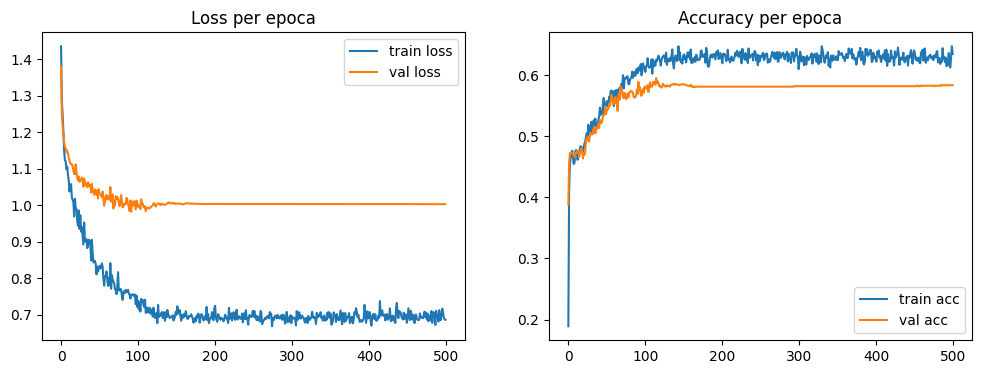

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification report (validation):
              precision    recall  f1-score   support

           0     0.8578    0.6670    0.7505       904
           1     0.2794    0.3262    0.3010       233
           2     0.2198    0.4959    0.3046       121
           3     0.0500    0.1000    0.0667        10

    accuracy                         0.5836      1268
   macro avg     0.3517    0.3973    0.3557      1268
weighted avg     0.6842    0.5836    0.6199      1268



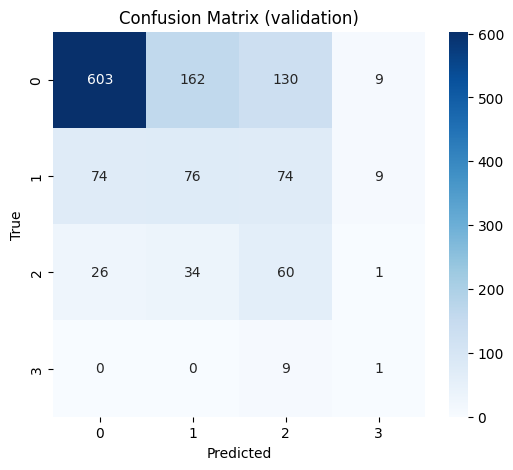

Recall classe severe (3): 0.1000


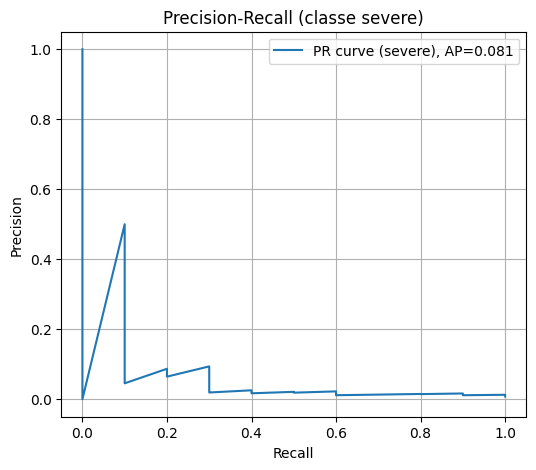

{np.int64(0): np.float64(0.35081240768094535), np.int64(1): np.float64(1.3610315186246418), np.int64(2): np.float64(2.6243093922651934), np.int64(3): np.float64(29.6875)}


In [77]:
hidden_units=[64, 32]
activation='relu'
lr=1e-3
dropout=0.2 # dropout 20%
l2_reg=0
patience_early_stopping = 75
patience_reduce_lr = 25
factor = 0.2
min_lr=1e-6
epochs = 500
batch_size=64

# class_weights[0] = 1 
# class_weights[1] = 1 
# class_weights[2] = 1
# class_weights[3] = 1
print(class_weights)

esegui_modello(
    hidden_units=hidden_units,
    activation=activation,
    lr=lr,
    dropout=dropout,
    l2_reg=l2_reg,
    patience_early_stopping=patience_early_stopping,
    patience_reduce_lr=patience_reduce_lr,
    factor=factor,
    min_lr=min_lr,
    epochs=epochs,
    batch_size=batch_size
)
# ogni volta che cambio i pesi, se devo ristabilire quelli iniziali
# class_weights = {cls: w for cls, w in zip(classes, auto_weights)}
print(class_weights)

**1. lascio i parametri di default, aumento i pesi delle classi 2 (+10%) e 3 (+20%)**

il modello peggiora da ogni punto di vista

**2. lascio i parametri di default, ma tolgo totalmente i pesi**

L'ho fatto solo per conferma. Dal momento che la classe 0 è fortemente predominante, il modello risulta essere quasi equivalente alla moda vista come modello base, leggermente migliore, ma non si discosta troppo. Completamente sbagliato nella classe 3, che ha una sia la precision che la recall pari a 0.

**3. aumento numero di layer e neuroni, lascio intatto il resto ([128, 64, 32]). Provo a evitare overfitting**

1. la classe 0 aumenta sia di precision che di recall, stesso vale per la classe 1. le classi 2 e 3 invece calano. Anche la forma della confusion matrix è peggiorata, tendendo a favorire le prime due classi. 
Sono curioso adesso di vedere cosa succede se aumento ulteriormente il numero di neuroni, rendendo il modello più potente, aumentando anche la pazienza e il learning rate iniziale. Se aumenta ancora la capacità di predire le prime due classi, provo ad aumentare il peso delle altre, lasciando la struttura così "ingrandita". Siccome aumento molto la grandezza della rete neuronale, devo evitare l'overfitting, quindi vado a inserire anche un dropout casuale dell'1%

2. Come previsto, c'è un notevole overfitting, con accuracy sul training che schizza a quasi il 100% ma rimane stabile al 60 nel validation, con una loss che diverge. Posso provare ad aumentare il dropout per evitare overfitting, in quanto comunque anche sul validation le performance migliorano.

**4. torno sui miei passi e aumento solo il droupout**
1. aumentando il droupout al 20%, ho visto in generale migliorare le prestazioni. Sono tornato quindi sui miei passi. ho reimpostato i layer a [64, 32]. lasciando intatte le altre modifiche, e i risultati si sono rivelati più soddisfacenti dei precedenti:
   -  l'accuracy passa dal 53.9% del primo modello al 55.2% del secondo al 58.5 del terzo
   -  l'F1 delle classi 0 e 2 aumentano rispetto a entrambi i modelli (in particolare la classe 2, ha un aumento progressivo da 0.17 a 0.33), quello della classe 1 rimane stabile, a meno di qualche fluttuazione. 
   -  La classe 3 risulta invece problematica: la recall è calata sensibilmente (0.7 -> 0.2 -> 0.1), con la precision rimasta stabile, segno che il modello non è proprio in grado di catturarla. Il lato positivo è che 8 dei "true 2" sono stati classificati come 2, quindi non particolarmente distante, il lato negativo è che ci sono ancora 20 osservazioni classificate come 3 che in realtà sono di classe 0. quelle classificate come 3 ma appartenenti alle classi 1 e 2 sono invece diminuite, andando quindi a diminuire il false positive rate (che comunque è crollato rispetto al modello base).
   -  in generale, la media aritmetica dell'F1-score è aumentata, da 0.32 a 0.36, che è un buon segno, ed è aumentata anche la media ponderata, da 0.60 a 0.62, segno comunque di un complesivo miglioramento.  

2. lasciando intatte le modifiche fatte al punto precedente, provo ad aumentare leggermente i pesi delle classi 2 e 3, per vedere se il modello riesce a catturarle meglio. Dovrei aspettarmi un leggero calo dell'accuracy, perché le prestazioni si concentrano sulle classi minoritarie. -> Dopo svariati tentativi, modificando i moltiplicatori in tanti modi diversi, le prestazioni non sono mai migliorate, dal punto di vista di nessuna metrica.

per ora il miglior modello trovato ha questi iperparametri:
```
hidden_units=[64, 32]
activation='relu'
lr=1e-3
dropout=0.2 # dropout 20%
l2_reg=0
patience_early_stopping = 75
patience_reduce_lr = 25
factor = 0.2
min_lr=1e-6
epochs = 500
batch_size=64
```
   

# Cambio paradigma
Cosa potrei fare?

pensavo piuttosto a qualcosa del tipo "prima predico se è 0/1 0 2/3 (rispettivamente, non problematico e problematico), poi seleziono meglio tra le due classi"
In fondo, per lo scopo del progetto, se le classi 3 mi vengono predette come 2, non è sto grandissimo problema. È molto peggio se mi vengono predette come 1 o, peggio, 0.

Il problema quindi non è puramente di classificazione multiclasse nominale, ma ha una struttura ordinal (0 < 1 < 2 < 3). Con le metriche classiche (accuracy, F1, ecc.) tutti gli errori pesano uguale, cioè: predire 2 invece di 3 ha lo stesso “costo” che predire 0 invece di 3,cosa che è evidentemente fuorviante nel nostro caso.
Posso quindi usare alcune metriche alternative:
- MAE (Mean Absolute Error): misura misura l’errore medio “in numero di classi”, quindi di quanto classi ci si sbaglia (0.5 vuol dire che in media il modello sbaglia di mezza classe).
- MSE (Mean Squared Error): penalizza di più gli errori grossi (predire 0 al posto di 3 pesa molto più che 2 al posto di 3).

Per prima cosa quindi provo a usare mse come funzione di loss.

{np.int64(0): np.float64(0.35081240768094535), np.int64(1): np.float64(1.3610315186246418), np.int64(2): np.float64(2.6243093922651934), np.int64(3): np.float64(29.6875)}
Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.5258 - loss: 2.0657 - mae: 0.5947 - val_accuracy: 0.3525 - val_loss: 0.5717 - val_mae: 0.6574 - learning_rate: 0.0010
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3568 - loss: 1.4929 - mae: 0.7472 - val_accuracy: 0.2729 - val_loss: 0.9121 - val_mae: 0.8277 - learning_rate: 0.0010
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3005 - loss: 1.3296 - mae: 0.9037 - val_accuracy: 0.2532 - val_loss: 1.1584 - val_mae: 0.9177 - learning_rate: 0.0010
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2995 - loss: 1.1637 - mae: 0.9347 - val_accuracy: 0.3186 - val_loss: 1.0661 - val_mae: 0.8680 - learning_rate: 0.0010
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3442 - loss: 1.0672 - mae: 0.86

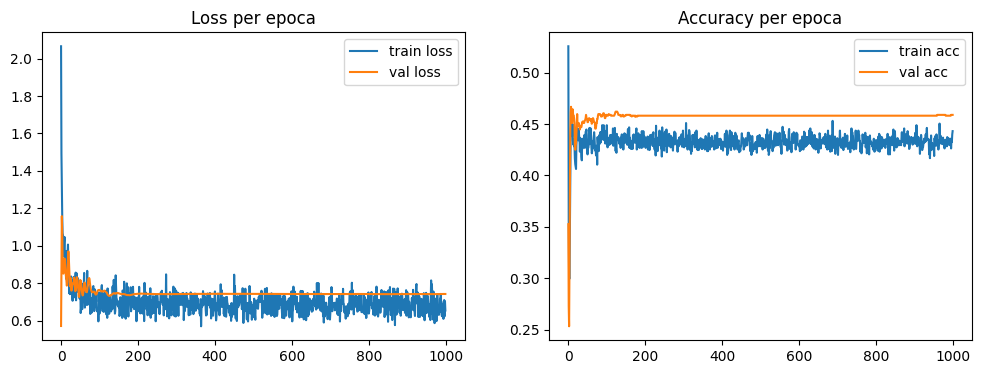

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Classification report (validation):
              precision    recall  f1-score   support

           0     0.8995    0.4259    0.5781       904
           1     0.2293    0.6309    0.3364       233
           2     0.2461    0.3884    0.3013       121
           3     0.1250    0.1000    0.1111        10

    accuracy                         0.4574      1268
   macro avg     0.3750    0.3863    0.3317      1268
weighted avg     0.7079    0.4574    0.5036      1268



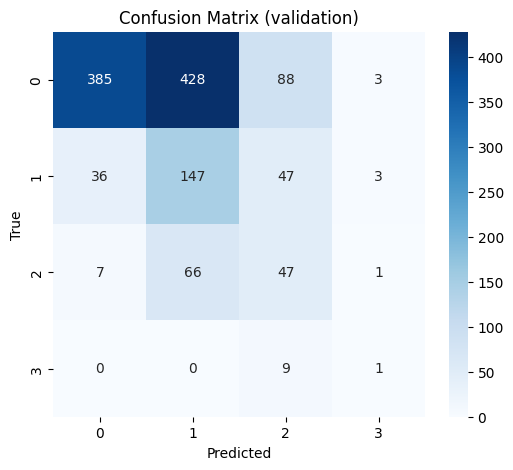

{np.int64(0): np.float64(0.35081240768094535), np.int64(1): np.float64(1.3610315186246418), np.int64(2): np.float64(2.6243093922651934), np.int64(3): np.float64(29.6875)}


In [ ]:
loss_case_multiclass = "mse"
metrics=['accuracy', 'mae']
batch_size = 512
epochs = 1000
hidden_units=[128, 64, 32]
activation='relu'
lr=1e-3
dropout=0.2
l2_reg=0
patience_early_stopping = 75
patience_reduce_lr = 25
factor = 0.5
min_lr=1e-6

class_weights = {cls: w for cls, w in zip(classes, auto_weights)}
print(class_weights)

esegui_modello(
    _num_classes=None,
    loss_case_multiclass=loss_case_multiclass,
    metrics=metrics,
    batch_size=batch_size,
    epochs=epochs,
    hidden_units=hidden_units,
    activation=activation,
    lr=lr,
    dropout=dropout,
    l2_reg=l2_reg,
    patience_early_stopping=patience_early_stopping,
    patience_reduce_lr=patience_reduce_lr,
    factor=factor,
    min_lr=min_lr
)
print(class_weights)

{np.int64(0): np.float64(0.35081240768094535), np.int64(1): np.float64(1.3610315186246418), np.int64(2): np.float64(2.6243093922651934), np.int64(3): np.float64(29.6875)}
Epoch 1/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6858 - loss: 4.9606 - mse: 1.4375 - val_accuracy: 0.7090 - val_loss: 0.6730 - val_mse: 0.6730 - learning_rate: 1.0000e-04
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6426 - loss: 3.7843 - mse: 1.0079 - val_accuracy: 0.6648 - val_loss: 0.4843 - val_mse: 0.4843 - learning_rate: 1.0000e-04
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5511 - loss: 3.0216 - mse: 0.8558 - val_accuracy: 0.5268 - val_loss: 0.4697 - val_mse: 0.4697 - learning_rate: 1.0000e-04
Epoch 4/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5174 - loss: 2.3835 - mse: 0.8789 - val_accuracy: 0.4203 - val_loss: 0.5410 - val_mse: 0.5410 - learning_rate: 1.0000e-04
Epoch 5/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4768 -

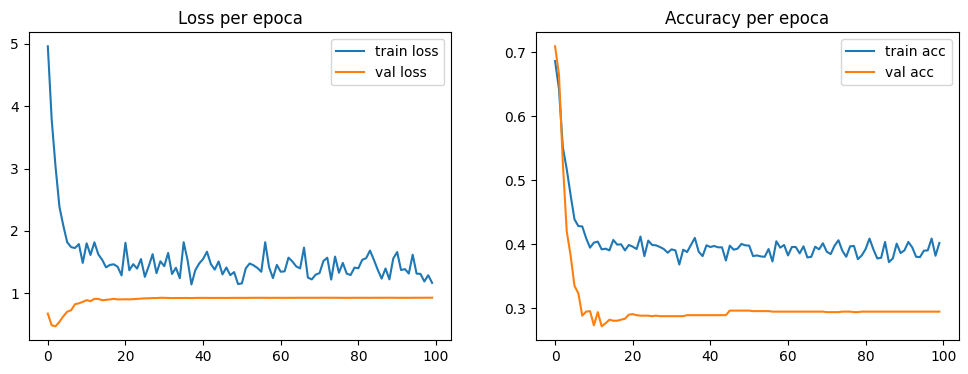

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification report (validation):
              precision    recall  f1-score   support

           0     0.9487    0.1637    0.2792       904
           1     0.1952    0.7253    0.3076       233
           2     0.2152    0.3967    0.2791       121
           3     0.1304    0.3000    0.1818        10

    accuracy                         0.2902      1268
   macro avg     0.3724    0.3964    0.2619      1268
weighted avg     0.7338    0.2902    0.2837      1268



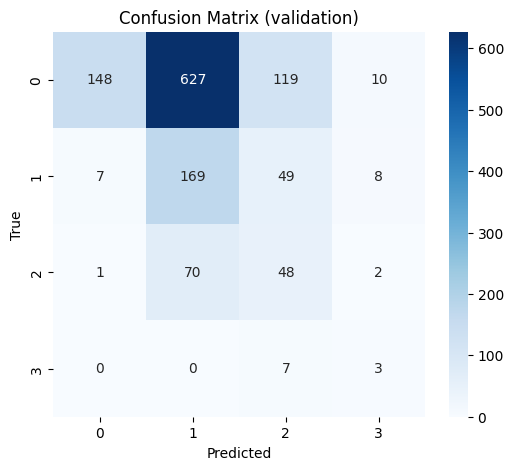

{np.int64(0): np.float64(0.35081240768094535), np.int64(1): np.float64(1.3610315186246418), np.int64(2): np.float64(2.6243093922651934), np.int64(3): np.float64(29.6875)}


In [74]:
loss_case_multiclass = "mae"
metrics=['accuracy', 'mse']
batch_size = 8
dropout = 0.4
epochs = 100
class_weights = {cls: w for cls, w in zip(classes, auto_weights)}
print(class_weights)

esegui_modello(
    _num_classes=None,
    loss_case_multiclass=loss_case_multiclass,
    metrics=metrics,
    batch_size=batch_size,
    epochs=epochs,
    dropout=dropout
)
print(class_weights)

Il cambio di paradigma si è rivelato fallimentare. Proveremo un'ultima strategia, proverò a usare un classificatore a cascata, come specificato sopra: prima predico binariamente con una random forest tra "probabilmente sano" e "probabilmente problematico". Dopodiché aggiungo questa predizione come feature nel dataset, così da "guidare" la rete neurale a predire la classe giusta.

=== Confusion Matrix - TRAIN ===
[[1670   33]
 [   1  196]]

=== Confusion Matrix - VAL ===
[[1069   68]
 [  86   45]]

=== Classification Report - TRAIN ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1703
           1       0.86      0.99      0.92       197

    accuracy                           0.98      1900
   macro avg       0.93      0.99      0.96      1900
weighted avg       0.98      0.98      0.98      1900


=== Classification Report - VAL ===
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1137
           1       0.40      0.34      0.37       131

    accuracy                           0.88      1268
   macro avg       0.66      0.64      0.65      1268
weighted avg       0.87      0.88      0.87      1268

TRAIN Accuracy RF: 0.9821
VAL Accuracy RF: 0.8785


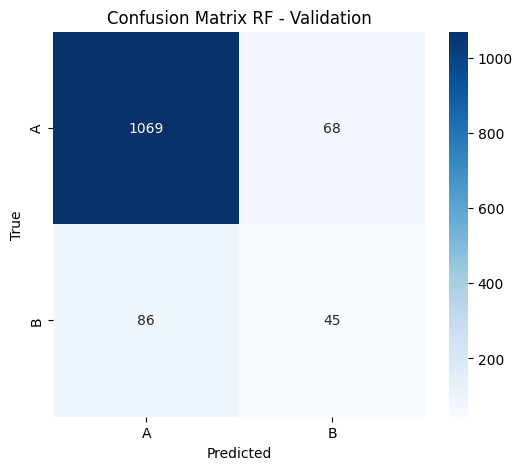

Shape train: (1900, 12)
Shape val: (1268, 12)
Epoch 1/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.4016 - loss: 1.4091 - val_accuracy: 0.5166 - val_loss: 1.2292 - learning_rate: 0.0010
Epoch 2/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4574 - loss: 1.2886 - val_accuracy: 0.4961 - val_loss: 1.1978 - learning_rate: 0.0010
Epoch 3/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4463 - loss: 1.2597 - val_accuracy: 0.4779 - val_loss: 1.1826 - learning_rate: 0.0010
Epoch 4/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4653 - loss: 1.1663 - val_accuracy: 0.4819 - val_loss: 1.1646 - learning_rate: 0.0010
Epoch 5/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4600 - loss: 1.1502 - val_accuracy: 0.4850 - val_loss: 1.1482 - learning_rate: 0.0010
Epoch 6/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4584 - loss: 1.1207 - val_accuracy: 0.4874 - val_loss: 1.1430 - learning_rate: 0.0010
Epoch 7/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 

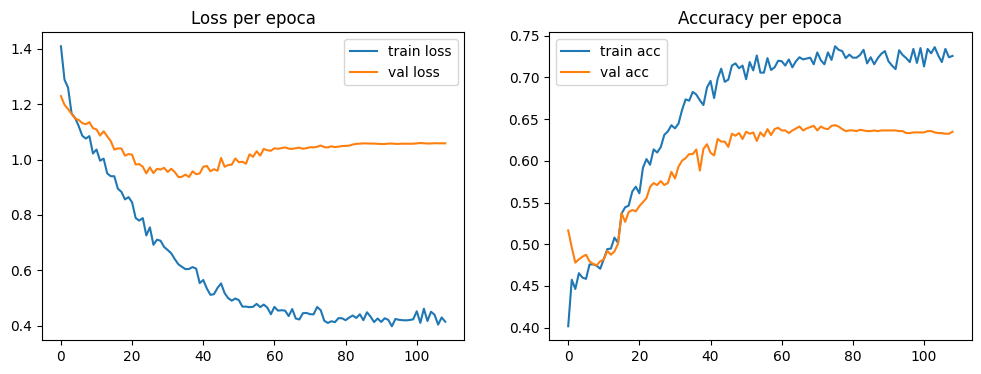

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification report (validation):
              precision    recall  f1-score   support

           0     0.8443    0.6958    0.7629       904
           1     0.2722    0.3948    0.3222       233
           2     0.2985    0.3306    0.3137       121
           3     0.0784    0.4000    0.1311        10

    accuracy                         0.6033      1268
   macro avg     0.3734    0.4553    0.3825      1268
weighted avg     0.6810    0.6033    0.6341      1268



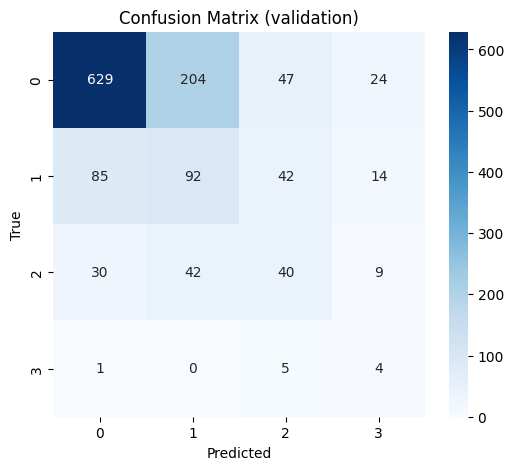

Recall classe severe (3): 0.4000


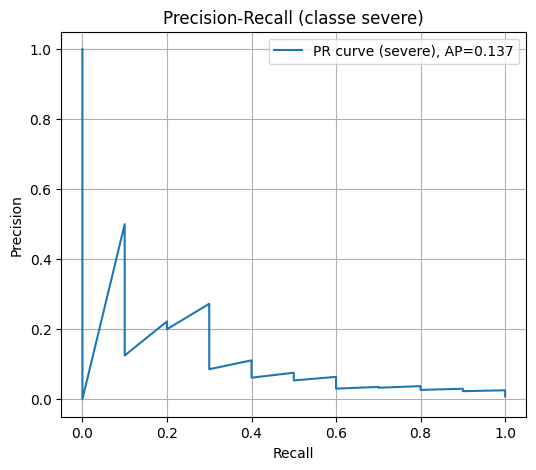

In [97]:
# --- 1. Creazione y binario ---
y_bin_tr = np.where(np.isin(y_tr, [0, 1]), 0, 1)
y_bin_val = np.where(np.isin(y_val, [0, 1]), 0, 1)

# --- 2. Alleniamo Random Forest ---
rf = RandomForestClassifier(
    random_state=SEED,
    class_weight='balanced',
    n_estimators=100,
    max_depth=10
)
rf.fit(X_tr_scaled, y_bin_tr)

# --- 3. Predizione RF per report ---
rf_probs_train = rf.predict_proba(X_tr_scaled)[:,1].reshape(-1,1)
rf_probs_val = rf.predict_proba(X_val_scaled)[:,1].reshape(-1,1)

# predizione numerica 0/1 per metriche
rf_pred_train = (rf_probs_train >= 0.5).astype(int).ravel()
rf_pred_val = (rf_probs_val >= 0.5).astype(int).ravel()

# --- Report RF ---
cm_train = confusion_matrix(y_bin_tr, rf_pred_train)
cm_val = confusion_matrix(y_bin_val, rf_pred_val)

print("=== Confusion Matrix - TRAIN ===")
print(cm_train)
print("\n=== Confusion Matrix - VAL ===")
print(cm_val)

print("\n=== Classification Report - TRAIN ===")
print(classification_report(y_bin_tr, rf_pred_train))
print("\n=== Classification Report - VAL ===")
print(classification_report(y_bin_val, rf_pred_val))

acc_train = accuracy_score(y_bin_tr, rf_pred_train)
acc_val = accuracy_score(y_bin_val, rf_pred_val)
print(f"TRAIN Accuracy RF: {acc_train:.4f}")
print(f"VAL Accuracy RF: {acc_val:.4f}")

plt.figure(figsize=(6,5))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=['A','B'], yticklabels=['A','B'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix RF - Validation")
plt.show()

# --- 4. Aggiungiamo probabilità RF come feature continua ---
X_bin_tr = np.hstack([X_tr_scaled, rf_probs_train])
X_bin_val = np.hstack([X_val_scaled, rf_probs_val])
n_features_aug = X_bin_tr.shape[1]

print("Shape train:", X_bin_tr.shape)
print("Shape val:", X_bin_val.shape)

# --- 5. Allenamento rete neurale ---
model = esegui_modello(
    X = X_bin_tr,
    Xv = X_bin_val,
    _num_features=n_features_aug,
    _num_classes=len(np.unique(y_train)),  # 0-3
    hidden_units=[64, 32],
    activation='relu',
    lr=1e-3,
    dropout=0.2, 
    l2_reg=0,
    patience_early_stopping=75,
    patience_reduce_lr=25,
    factor=0.2,
    min_lr=1e-6,
    epochs=500,
    batch_size=64
)


Abbiamo usato le **probabilità del Random Forest** come nuova feature (invece della classe secca).  
Questo approccio fornisce più informazione e permette alla NN di correggere le incertezze del RF.  
Risultato: migliorata la recall delle classi minori (es. classe 3 da ~0 a ~0.40) mantenendo stabilità sulle maggiori.  


## Hyperparameter Tuning

Il modello precedente ha fornito buoni risultati. Tuttavia, la scelta degli iperparametri è stata abbastanza "a tentativi", basandoci sulle best practice trovate su internet e negli appunti. Per garantire di aver trovato una configurazione ottimale in modo sistematico e riproducibile, procediamo ora con una fase di Hyperparameter Tuning automatico utilizzando Keras Tuner

L'obiettivo è trovare la combinazione di iperparametri (es. numero di neuroni, learning rate, dropout, ecc.) che dà i risultati migliori sul validation set, in modo automatico. useremo Keras Tuner. È una libreria creata appositamente per questo scopo, si integra perfettamente con TensorFlow/Keras ed è molto più efficiente e semplice da usare.

In [98]:
import keras_tuner as kt
import tensorflow as tf

In [110]:
def build_model(hp):
    """
    Funzione che costruisce un modello di rete neurale con iperparametri
    definiti da Keras Tuner.
    """
    
    # variabili da utilizzare 

    _num_features = n_features_aug 
    _num_classes = len(np.unique(y_train))

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(_num_features,)))


    # calibra il numero di neuroni nel primo layer denso
    hp_units_1 = hp.Int('units_1', min_value=32, max_value=128, step=16)
    # calibra la funzione di attivazione
    hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
    # calibra il valore di regolarizzazione L2
    hp_l2 = hp.Float('l2_reg', min_value=0.0000001, max_value=0.01, sampling='log')

    model.add(tf.keras.layers.Dense(units=hp_units_1, activation=hp_activation,
                                    kernel_regularizer=tf.keras.regularizers.l2(hp_l2)))

    # calibra il tasso di Dropout
    hp_dropout = hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)
    model.add(tf.keras.layers.Dropout(hp_dropout))

    # Aggiungiamo un secondo layer denso, trovando il numero di neuroni migliore
    hp_units_2 = hp.Int('units_2', min_value=16, max_value=64, step=16)
    model.add(tf.keras.layers.Dense(units=hp_units_2, activation=hp_activation,
                                    kernel_regularizer=tf.keras.regularizers.l2(hp_l2)))

    model.add(tf.keras.layers.Dense(_num_classes, activation='softmax'))

    # --- calibra il Learning Rate dell'ottimizzatore ---
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model



# X_bin_tr e y_train    sono i dati di training
# X_bin_val e y_val     sono i dati di validation

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',   # obiettivo: massimizzare accuracy sul validation
    max_trials=100,             # Numero totale di combinazioni da provare
    executions_per_trial=2,     # eseguire due volte il modello serve per questioni di stabilità
    directory='my_keras_tuner', # Cartella dove salvare i risultati
    project_name='dwm_tuning'
)


stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

print("\ninizio tuning...")


tuner.search(
    X_bin_tr, y_tr,
    epochs=150, #non serve un numero eccessivo, basta che tenda a convergere
    validation_data=(X_bin_val, y_val),
    callbacks=[stop_early],
    class_weight=class_weights
)


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
---  RICERCA COMPLETATA  ---

I migliori iperparametri trovati sono:
- Unità primo layer: {best_hps.get('units_1')}
- Unità secondo layer: {best_hps.get('units_2')}
- Funzione di attivazione: {best_hps.get('activation')}
- Tasso di Dropout: {best_hps.get('dropout'):.2f}
- Regolarizzazione L2: {best_hps.get('l2_reg'):.4f}
- Learning Rate: {best_hps.get('learning_rate')}
""")

#-------------------------------------------------------------------------------
# 5. ADDESTRAMENTO DEL MODELLO FINALE CON I PARAMETRI MIGLIORI
#-------------------------------------------------------------------------------

# Costruisci il modello con i migliori iperparametri trovati
final_model = tuner.hypermodel.build(best_hps)

# Ora addestra questo modello finale su TUTTI i dati di training (training + validation)
# per dargli più dati possibili prima del test finale.
# X_train_full = np.concatenate([X_bin_tr, X_bin_val])
# y_train_full = np.concatenate([y_train, y_val])

# NOTA: Per semplicità e coerenza, puoi anche addestrarlo solo sul training set
# originale, come facevi prima, ma usando un numero maggiore di epoche.
# Userò questo approccio qui.

print("\n💪 Addestramento del modello finale con i parametri ottimali...")

history = final_model.fit(
    X_bin_tr, y_tr,
    epochs=500, # Addestra per più epoche, l'early stopping si occuperà di fermarsi
    validation_data=(X_bin_val, y_val),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=75),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=25, min_lr=1e-6)
    ],
    class_weight=class_weights,
    verbose=1
)

# Il tuo 'final_model' è ora il modello di rete neurale ottimizzato,
# pronto per essere usato nel tuo ensemble e per il test finale!
# Salvalo per poterlo riutilizzare
final_model.save('neural_network_tuned_model.h5')

print("\n✅ Modello ottimizzato e salvato come 'neural_network_tuned_model.h5'")

Trial 100 Complete [00h 06m 19s]
val_accuracy: 0.578864336013794

Best val_accuracy So Far: 0.6731072664260864
Total elapsed time: 06h 06m 59s

---  RICERCA COMPLETATA  ---

I migliori iperparametri trovati sono:
- Unità primo layer: 128
- Unità secondo layer: 48
- Funzione di attivazione: tanh
- Tasso di Dropout: 0.10
- Regolarizzazione L2: 0.0073
- Learning Rate: 0.01


💪 Addestramento del modello finale con i parametri ottimali...
Epoch 1/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.4768 - loss: 1.8360 - val_accuracy: 0.5536 - val_loss: 1.5883 - learning_rate: 0.0100
Epoch 2/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.6116 - loss: 1.2691 - val_accuracy: 0.6396 - val_loss: 1.3368 - learning_rate: 0.0100
Epoch 3/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.6326 - loss: 1.0713 - val_accuracy: 0.6656 - val_loss: 1.1971 - learning_rate: 0.0100
Epoch 4/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.6311 - loss: 0.9872 - val_accuracy: 0.66


✅ Modello ottimizzato e salvato come 'neural_network_tuned_model.h5'


# per dopo, alla fine di tutto
Alla fine, col test devo eseguire le stesse trasformazioni fatte sul train, per poterlo utilizzare (le stagioni devono diventare variabili numeriche, devo droppare le features usate per l'imputazione e devo standardizzare)

```py
X_test = X_test.drop(columns=proxy_features)

# rieseguo il mapping stagioni sul nuovo X_test
season_map = {
    'Winter': 0,
    'Spring': 1,
    'Summer': 2,
    'Fall': 3
}
season_cols = [col for col in X_test.columns if col.endswith('Season')]

for col in season_cols:
    X_test[col] = X_test[col].map(season_map)
```